<a href="https://colab.research.google.com/github/DataDoggo215/Predicting_BitcoinPrices/blob/main/BitPredict_time_series_forecastng.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Will Bitcoin prices remain on the downward trend or will it go back up?

We're going to be using the historical price data of Bitcoin to try and predict the future price of Bitcoin, we downloaded the data from here: https://finance.yahoo.com/quote/BTC-USD/. I downloaded the price data and uploaded it to my google drive in a csv format.

#Exploratory Data Analysis

In [2]:
#Mount to Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
# Import with pandas
import pandas as pd 
# Let's read in our Bitcoin data and parse the dates
df = pd.read_csv('/content/gdrive/My Drive/BTC_prices.csv',
                 parse_dates=["Date"],
                 index_col=["Date"]) # parse the date column and tell pandas column 1 is a datetime 

df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [4]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-06-25,21233.609375,21520.914063,20964.585938,21502.337891,21502.337891,18372538715
2022-06-26,21496.494141,21783.724609,21016.269531,21027.294922,21027.294922,18027170497
2022-06-27,21028.238281,21478.089844,20620.199219,20735.478516,20735.478516,20965695707
2022-06-28,20731.544922,21164.423828,20228.812500,20280.634766,20280.634766,21381535161
2022-06-29,20281.169922,20364.156250,19937.791016,20104.023438,20104.023438,23552740328


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2843 entries, 2014-09-17 to 2022-06-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2843 non-null   float64
 1   High       2843 non-null   float64
 2   Low        2843 non-null   float64
 3   Close      2843 non-null   float64
 4   Adj Close  2843 non-null   float64
 5   Volume     2843 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 155.5 KB


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2843 entries, 2014-09-17 to 2022-06-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2843 non-null   float64
 1   High       2843 non-null   float64
 2   Low        2843 non-null   float64
 3   Close      2843 non-null   float64
 4   Adj Close  2843 non-null   float64
 5   Volume     2843 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 155.5 KB


In [7]:
len(df)

2843

In [8]:
# Only want closing price for each day
bitcoin_prices = pd.DataFrame(df["Adj Close"]).rename(columns={"Adj Close": "Price"})
bitcoin_prices.head()

,Price
Date,
2014-09-17,457.334015
2014-09-18,424.440002
2014-09-19,394.795990
2014-09-20,408.903992
2014-09-21,398.821014


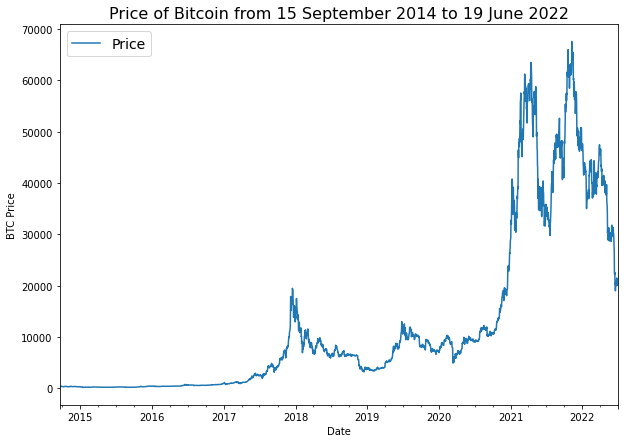

In [9]:
import matplotlib.pyplot as plt
bitcoin_prices.plot(figsize=(10, 7))
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin from 15 September 2014 to 19 June 2022", fontsize=16)
plt.legend(fontsize=14);

Importing time series data with Python's CSV module

In [10]:
# Importing and formatting historical Bitcoin data with Python
import csv
from datetime import datetime

timesteps = []
btc_price = []
with open('/content/gdrive/My Drive/BTC_prices.csv', 'r') as f:
  csv_reader = csv.reader(f, delimiter=",")
  next(csv_reader) # skip first line (this gets rid of the column titles)
  for line in csv_reader:
    timesteps.append(datetime.strptime(line[0], "%Y-%m-%d")) # get the dates as dates (not strings)
    btc_price.append(float(line[5])) # get the adj closing price as float

# View first 10 of each
timesteps[:10], btc_price[:10]

([datetime.datetime(2014, 9, 17, 0, 0),
  datetime.datetime(2014, 9, 18, 0, 0),
  datetime.datetime(2014, 9, 19, 0, 0),
  datetime.datetime(2014, 9, 20, 0, 0),
  datetime.datetime(2014, 9, 21, 0, 0),
  datetime.datetime(2014, 9, 22, 0, 0),
  datetime.datetime(2014, 9, 23, 0, 0),
  datetime.datetime(2014, 9, 24, 0, 0),
  datetime.datetime(2014, 9, 25, 0, 0),
  datetime.datetime(2014, 9, 26, 0, 0)],
 [457.334015,
  424.440002,
  394.79599,
  408.903992,
  398.821014,
  402.152008,
  435.790985,
  423.204987,
  411.574005,
  404.424988])

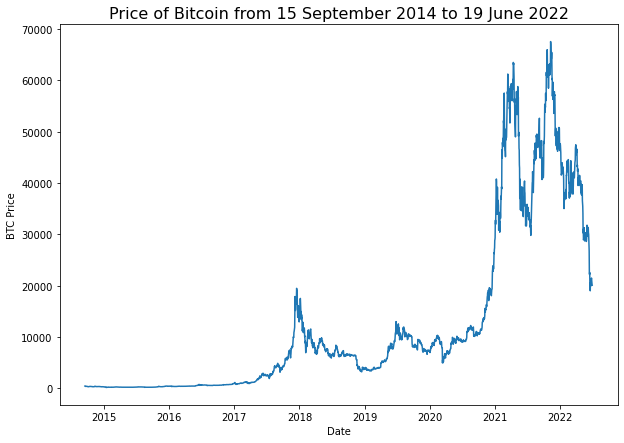

In [11]:
# Plot from CSV
import matplotlib.pyplot as plt
# import numpy as np
plt.figure(figsize=(10,7))
plt.plot(timesteps, btc_price)
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin from 15 September 2014 to 19 June 2022", fontsize=16)
plt.xlabel("Date");

**Format data part 1: Create train and test sets of our time series data**

⚠ Wrong Way to do it!

In [12]:
bitcoin_prices[:5]

,Price
Date,
2014-09-17,457.334015
2014-09-18,424.440002
2014-09-19,394.795990
2014-09-20,408.903992
2014-09-21,398.821014


In [13]:
# Get bitcoin date array
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices["Price"].to_numpy()

timesteps[:10], prices[:10]

(array(['2014-09-17T00:00:00.000000000', '2014-09-18T00:00:00.000000000',
        '2014-09-19T00:00:00.000000000', '2014-09-20T00:00:00.000000000',
        '2014-09-21T00:00:00.000000000', '2014-09-22T00:00:00.000000000',
        '2014-09-23T00:00:00.000000000', '2014-09-24T00:00:00.000000000',
        '2014-09-25T00:00:00.000000000', '2014-09-26T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([457.334015, 424.440002, 394.79599 , 408.903992, 398.821014,
        402.152008, 435.790985, 423.204987, 411.574005, 404.424988]))

In [14]:
# Wrong way to make train/test sets for time series data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(timesteps, # dates
                                                    prices, # BTC prices
                                                    test_size=0.2,
                                                    random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2274,), (569,), (2274,), (569,))

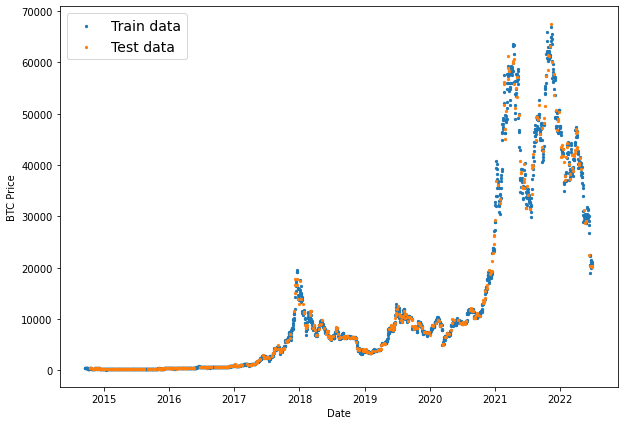

In [15]:
# Let's plot wrong train and test splits
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show();

✅ Correct way to do split

In [16]:
# Create train and test splits the right way for time series data
split_size = int(0.8 * len(prices)) # 80% train, 20% test - you can change these values as needed, e.g. 90/10, 95/5

# Create train data splits (everything before the split)
X_train, y_train = timesteps[:split_size], prices[:split_size]

# Create test data splits (everything beyond the split)
X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)

(2274, 569, 2274, 569)

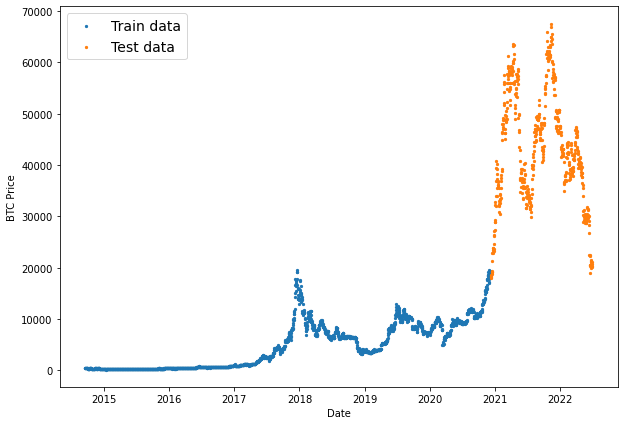

In [17]:
# Plot correctly made splits
plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show();

Let's create a plotting function so we don't have to do it each time.

In [18]:
# Create a function to plot time series data
def plot_time_series(timesteps, values, format=".", start=0, end=None, label=None):
  """
  Plots timesteps (a series of points in time) against values (a series of values across timesteps).

  Parameters
  ----------
  timesteps : array of timestep values
  values : array of values across time
  format : style of plot, default "."
  start : where to start the plot (setting a value will index from start of timesteps & values)
  end : where to end the plot (similar to start but for the end)
  label : label to show on plot about values, default None 
  """
  # Plot the series
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14) # make label bigger
  plt.grid(True)

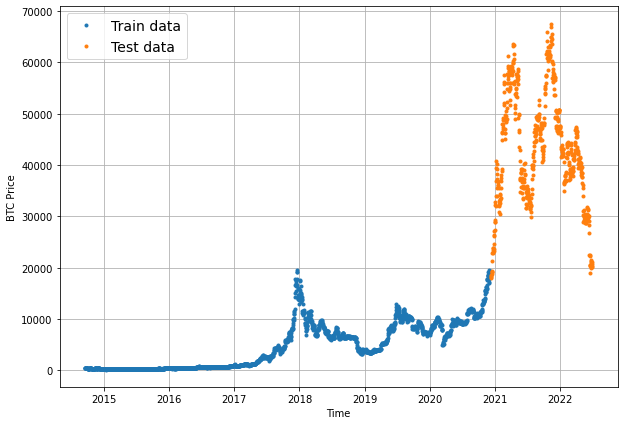

In [19]:
# Test out plotting function
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")

#Modeling

We've got some Bitcoin historical data, to model it, let's run a series of modelling experiments and see which model performs best.

Horizon = number of timesteps into the future we're going to predict

Window size = number of timesteps we're going to use to predict horizon

The prediction at timestep t (y-hat) is equal to the value at timestep t-1 (previous timestep) - this is for a horizon of 1.

Modelling experiments we're running:

*   0 Naïve model (baseline)
*   1 Dense model, horizon = 1, window = 7
*   2 Same as 1, horizon = 1, window = 30
*   3 Same as 1, horizon = 7, window = 30
*   4 Conv1D
*   5 LSTM
*   6 Same as 1 (but with multivariate data)
*   7 N-BEATs Algorithm
*   8 Ensemble (multiple models optimized on different loss functions)
*   9 Future prediction model (model to predict future values)
*   10 Same as 1 (but with turkey 🦃 data introduced)

## Model 0: Naive forecast (baseline)

In [20]:
y_test[:10]

array([18321.144531, 18553.916016, 18264.992188, 18058.904297,
       18803.65625 , 19142.382813, 19246.644531, 19417.076172,
       21310.597656, 22805.162109])

In [21]:
# Create a naive forecast 
naive_forecast = y_test[:-1]

naive_forecast[:10], naive_forecast[-10:]

(array([18321.144531, 18553.916016, 18264.992188, 18058.904297,
        18803.65625 , 19142.382813, 19246.644531, 19417.076172,
        21310.597656, 22805.162109]),
 array([20553.271484, 20599.537109, 20710.597656, 19987.029297,
        21085.876953, 21231.65625 , 21502.337891, 21027.294922,
        20735.478516, 20280.634766]))

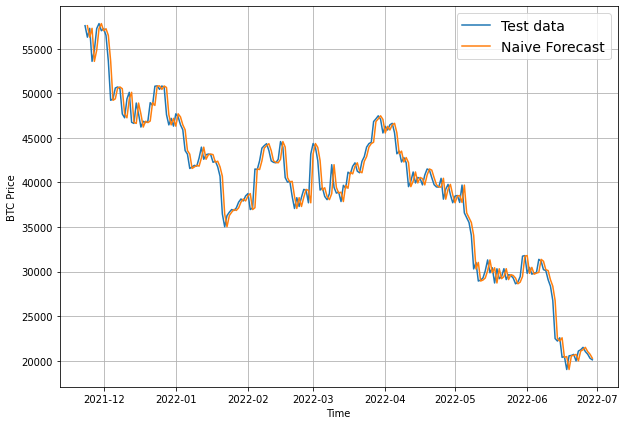

In [22]:
# Plot naive forecast
plt.figure(figsize=(10, 7))
# plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, start=350, format="-", label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, start=350, format="-", label="Naive Forecast")

**Time Series Model Evaluation**

The main thing we're evaluating here is: how do our model's forecasts (y_pred) compare against the actual values (y_true or ground truth values)?

A few common regression metrics (which can also be used for time series forecasting):

*   MAE - mean absolute error
*   MSE - mean squared error
*   RMSE - root mean square error
*   MAPE/sMAPE - (symmetric) mean absolute percentage error
*   MASE - mean absolute scaled error

In [23]:
import tensorflow as tf

In [24]:
# MASE implementation
def mean_absolute_scaled_error(y_true, y_pred):
  """
  Implement MASE (assuming no seasonality of data).
  """
  mae = tf.reduce_mean(tf.abs(y_true-y_pred))

  # Find MAE of naive forecast (no seasonality)
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1])) # our seasonality is 1 day (hence the shift of 1)

  return mae / mae_naive_no_season

In [25]:
# Test MASE (this value should = 1 or be very close to 1 with the naive forecast)
mean_absolute_scaled_error(y_true=y_test[1:], y_pred=naive_forecast).numpy()

0.998568957044959

In [26]:
# Create a function to take in model predictions and truth values and return evaluation metrics
def evaluate_preds(y_true, y_pred):
  # Make sure float32 datatype (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various evaluation metrics 
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [27]:
naive_results = evaluate_preds(y_true=y_test[1:],
                               y_pred=naive_forecast)

naive_results

{'mae': 1241.873,
 'mape': 2.9580142,
 'mase': 0.9985689,
 'mse': 2914935.8,
 'rmse': 1707.3184}

In [28]:
naive_forecast[-10:]

array([20553.271484, 20599.537109, 20710.597656, 19987.029297,
       21085.876953, 21231.65625 , 21502.337891, 21027.294922,
       20735.478516, 20280.634766])

In [29]:
tf.reduce_mean(y_test)

<tf.Tensor: shape=(), dtype=float64, numpy=43087.29283154833>

In [30]:
tf.reduce_min(y_test), tf.reduce_max(y_test)

(<tf.Tensor: shape=(), dtype=float64, numpy=18058.904297>,
 <tf.Tensor: shape=(), dtype=float64, numpy=67566.828125>)

Resource for other time series forecasting modeling: https://dev.mrdbourke.com/tensorflow-deep-learning/10_time_series_forecasting_in_tensorflow/#other-kinds-of-time-series-forecasting-models-which-can-be-used-for-baselines-and-actual-forecasts

**Creating windows for our dataset**

We window our time series dataset to turn our data into a supervised learning problem.

In [31]:
# What we want to do with our Bitcoin data
print(f"We want to use: {btc_price[:7]} to predict this: {btc_price[7]}")

We want to use: [457.334015, 424.440002, 394.79599, 408.903992, 398.821014, 402.152008, 435.790985] to predict this: 423.204987


In [32]:
# Let's setup global variables for window and horizon size
HORIZON = 1 # predict next 1 day
WINDOW_SIZE = 7 # use the past week of Bitcoin data to make the prediction

In [33]:
# Create function to label windowed data
def get_labelled_windows(x, horizon=HORIZON):
  """
  Creates labels for windowed dataset.

  E.g. if horizon=1
  Input: [0, 1, 2, 3, 4, 5, 6, 7] -> Output: ([0, 1, 2, 3, 4, 5, 6], [7])
  """
  return x[:, :-horizon], x[:, -horizon:]

In [34]:
# Test out the window labelling function
test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(8), axis=0))
print(f"Window: {tf.squeeze(test_window).numpy()} -> Label: {tf.squeeze(test_label).numpy()}")

Window: [0 1 2 3 4 5 6] -> Label: 7


We could create a a python loop to create windows for our entire data set, but there are better methods for larger data. To speed things up, we'll leverage NumPy's array indexing - https://numpy.org/doc/stable/reference/arrays.indexing.html. We could also do something similiar with keras: https://www.tensorflow.org/api_docs/python/tf/keras/utils/timeseries_dataset_from_array

In [35]:
import numpy as np

# Create function to view NumPy arrays as windows
def make_windows(x, window_size=WINDOW_SIZE, horizon=HORIZON):
  """
  Turns a 1D array into a 2D array of sequential labelled windows of window_size with horizon size labels.
  """
  # 1. Create a window of specific window_size (add the horzion on the end for labelling later)
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)

  # 2. Create a 2D array of multiple window steps (minus 1 to account for 0 indexing)
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T # create 2D array of windows of size window_size
  # print(f"Window indexes:\n {window_indexes, window_indexes.shape}")

  # 3. Index on the target array (a time series) with 2D array of multiple window steps
  windowed_array = x[window_indexes]
  # print(windowed_array)

  # 4. Get the labelled windows
  windows, labels = get_labelled_windows(windowed_array, horizon=horizon)
  return windows, labels

In [36]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2836, 2836)

In [37]:
# View the first 3 windows/labels
for i in range(3):
  print(f"Window: {full_windows[i]} -> Label: {full_labels[i]}")

Window: [457.334015 424.440002 394.79599  408.903992 398.821014 402.152008
 435.790985] -> Label: [423.204987]
Window: [424.440002 394.79599  408.903992 398.821014 402.152008 435.790985
 423.204987] -> Label: [411.574005]
Window: [394.79599  408.903992 398.821014 402.152008 435.790985 423.204987
 411.574005] -> Label: [404.424988]


In [38]:
# View the last 3 windows/labels
for i in range(3):
  print(f"Window: {full_windows[i-3]} -> Label: {full_labels[i-3]}")

Window: [20599.537109 20710.597656 19987.029297 21085.876953 21231.65625
 21502.337891 21027.294922] -> Label: [20735.478516]
Window: [20710.597656 19987.029297 21085.876953 21231.65625  21502.337891
 21027.294922 20735.478516] -> Label: [20280.634766]
Window: [19987.029297 21085.876953 21231.65625  21502.337891 21027.294922
 20735.478516 20280.634766] -> Label: [20104.023438]


**Turning windows into training and test sets**

In [39]:
full_windows[:5], full_labels[:5]

(array([[457.334015, 424.440002, 394.79599 , 408.903992, 398.821014,
         402.152008, 435.790985],
        [424.440002, 394.79599 , 408.903992, 398.821014, 402.152008,
         435.790985, 423.204987],
        [394.79599 , 408.903992, 398.821014, 402.152008, 435.790985,
         423.204987, 411.574005],
        [408.903992, 398.821014, 402.152008, 435.790985, 423.204987,
         411.574005, 404.424988],
        [398.821014, 402.152008, 435.790985, 423.204987, 411.574005,
         404.424988, 399.519989]]), array([[423.204987],
        [411.574005],
        [404.424988],
        [399.519989],
        [377.181   ]]))

In [40]:
# Make the train/test splits
def make_train_test_splits(windows, labels, test_split=0.2):
  """
  Splits matching pairs of winodws and labels into train and test splits.
  """
  split_size = int(len(windows) * (1-test_split)) # this will default to 80% train/20% test
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]
  return train_windows, test_windows, train_labels, test_labels

In [41]:
# Create train and test windows 
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2268, 568, 2268, 568)

In [42]:
train_windows[:5], train_labels[:5]

(array([[457.334015, 424.440002, 394.79599 , 408.903992, 398.821014,
         402.152008, 435.790985],
        [424.440002, 394.79599 , 408.903992, 398.821014, 402.152008,
         435.790985, 423.204987],
        [394.79599 , 408.903992, 398.821014, 402.152008, 435.790985,
         423.204987, 411.574005],
        [408.903992, 398.821014, 402.152008, 435.790985, 423.204987,
         411.574005, 404.424988],
        [398.821014, 402.152008, 435.790985, 423.204987, 411.574005,
         404.424988, 399.519989]]), array([[423.204987],
        [411.574005],
        [404.424988],
        [399.519989],
        [377.181   ]]))

In [43]:
test_windows[:5], test_labels[:5]

(array([[19201.091797, 19445.398438, 18699.765625, 19154.230469,
         19345.121094, 19191.630859, 18321.144531],
        [19445.398438, 18699.765625, 19154.230469, 19345.121094,
         19191.630859, 18321.144531, 18553.916016],
        [18699.765625, 19154.230469, 19345.121094, 19191.630859,
         18321.144531, 18553.916016, 18264.992188],
        [19154.230469, 19345.121094, 19191.630859, 18321.144531,
         18553.916016, 18264.992188, 18058.904297],
        [19345.121094, 19191.630859, 18321.144531, 18553.916016,
         18264.992188, 18058.904297, 18803.65625 ]]), array([[18553.916016],
        [18264.992188],
        [18058.904297],
        [18803.65625 ],
        [19142.382813]]))

In [44]:
# Check to see if train labels are the same (before and after window split)
np.array_equal(np.squeeze(train_labels[:-HORIZON-1]), y_train[WINDOW_SIZE:])

False

In [45]:
import os

# Create a function to implement a ModelCheckpoint callback with a specific filename 
def create_model_checkpoint(model_name, save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name),
                                            monitor="val_loss",
                                            verbose=0, # only output a limited amount of text
                                            save_best_only=True)

## Model 1: Dense model (window = 7, horizon = 1)

In [46]:
import tensorflow as tf
from tensorflow.keras import layers

# Set random seed for as reproducible results as possible
tf.random.set_seed(42)

# 1. Construct model
model_1 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON, activation="linear") # linear activation is the same as having no activation               
], name="model_1_dense") # name our model so we can save it

# 2. Compile
model_1.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae", "mse"])

# 3. Fit the model
model_1.fit(x=train_windows,
            y=train_labels,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_1.name)])

Epoch 1/100
18/18 [==============================] - 4s 40ms/step - loss: 1135.0104 - mae: 1135.0104 - mse: 3792013.7500 - val_loss: 5021.2720 - val_mae: 5021.2720 - val_mse: 34128320.0000
Epoch 2/100
18/18 [==============================] - 0s 26ms/step - loss: 303.4462 - mae: 303.4462 - mse: 313550.4062 - val_loss: 2428.7646 - val_mae: 2428.7646 - val_mse: 9768288.0000
Epoch 3/100
18/18 [==============================] - 0s 26ms/step - loss: 244.6958 - mae: 244.6958 - mse: 228948.7656 - val_loss: 2234.7571 - val_mae: 2234.7571 - val_mse: 8387604.5000
Epoch 4/100
18/18 [==============================] - 0s 26ms/step - loss: 227.7251 - mae: 227.7251 - mse: 210081.4688 - val_loss: 2027.5540 - val_mae: 2027.5540 - val_mse: 6935848.5000
Epoch 5/100
18/18 [==============================] - 1s 30ms/step - loss: 221.8052 - mae: 221.8052 - mse: 202149.6562 - val_loss: 1979.0365 - val_mae: 1979.0365 - val_mse: 6565111.5000
Epoch 6/100
18/18 [==============================] - 0s 25ms/step - los

In [47]:
# Evaluate model on test data
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1329.2902 - mae: 1329.2902 - mse: 3158517.7500


[1329.2901611328125, 1329.2901611328125, 3158517.75]

In [48]:
# Load in saved best performing model_1 and evaluate it on test data
model_1 = tf.keras.models.load_model("model_experiments/model_1_dense/")
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1255.4781 - mae: 1255.4781 - mse: 2976047.0000


[1255.4781494140625, 1255.4781494140625, 2976047.0]

**Making forecasts with a model (on the test dataset)**

In [49]:
def make_preds(model, input_data):
  """
  Uses model to make predictions input_data.
  """
  forecast = model.predict(input_data)
  return tf.squeeze(forecast) # return 1D array of predictions

In [50]:
# Make predictions using model_1 on the test dataset and view results
model_1_preds = make_preds(model_1, test_windows) 
len(model_1_preds), model_1_preds[:10]

(568, <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([18408.262, 18524.451, 18300.623, 18097.004, 18623.896, 19149.676,
        19260.477, 19396.191, 21073.09 , 22563.725], dtype=float32)>)

In [51]:
tf.squeeze(test_labels).shape, model_1_preds.shape

(TensorShape([568]), TensorShape([568]))

In [52]:
# Evaluate preds
model_1_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_1_preds)
model_1_results

{'mae': 1255.478,
 'mape': 2.9978268,
 'mase': 1.0095085,
 'mse': 2976047.2,
 'rmse': 1725.1224}

In [53]:
naive_results

{'mae': 1241.873,
 'mape': 2.9580142,
 'mase': 0.9985689,
 'mse': 2914935.8,
 'rmse': 1707.3184}

In [54]:
test_labels.shape

(568, 1)

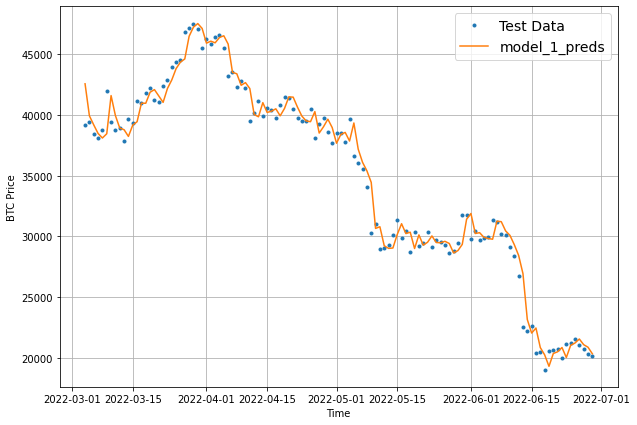

In [55]:
# Let's plot our model 1 predictions
offset = 450
plt.figure(figsize=(10, 7))
# Account for the test_window offset and index into test_labels to ensure correct plotting
plot_time_series(timesteps=X_test[-len(test_windows):], 
                 values=test_labels[:, 0], 
                 start=offset, 
                 label="Test Data")

plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=model_1_preds,
                 start=offset, 
                 format="-",
                 label="model_1_preds")

## Model 2: Dense (window = 30, horizon = 1)

In [56]:
HORIZON = 1 # predict one step at a time (one day of Bitcoin prices)
WINDOW_SIZE = 30 # use 30 timesteps in past

In [57]:
# Make windowed data with appropriate horizon and window sizes
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2813, 2813)

In [58]:
# Make train and testing windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows,
                                                                                labels=full_labels,
                                                                                test_split=0.2)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2250, 563, 2250, 563)

In [59]:
tf.random.set_seed(42)

# Create model
model_2 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON)
], name="model_2_dense")

# Compile
model_2.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit
model_2.fit(train_windows,
            train_labels,
            epochs=100,
            batch_size=128,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_2.name)])

INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: mod

In [60]:
# Evaluate model 2 on test data
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 5ms/step - loss: 1483.4805


1483.48046875

In [61]:
# Load in the best performing model
model_2 = tf.keras.models.load_model("model_experiments/model_2_dense/")
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1343.9061


1343.9061279296875

In [62]:
# Get forecast predictions
model_2_preds = make_preds(model_2,
                           input_data=test_windows)

In [63]:
tf.squeeze(test_labels).shape, model_2_preds.shape

(TensorShape([563]), TensorShape([563]))

In [64]:
# Evaluate results for model 2 predictions
model_2_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_2_preds)
model_2_results

{'mae': 1343.9061,
 'mape': 3.1932626,
 'mase': 1.073645,
 'mse': 3256637.0,
 'rmse': 1804.6155}

In [65]:
model_1_results

{'mae': 1255.478,
 'mape': 2.9978268,
 'mase': 1.0095085,
 'mse': 2976047.2,
 'rmse': 1725.1224}

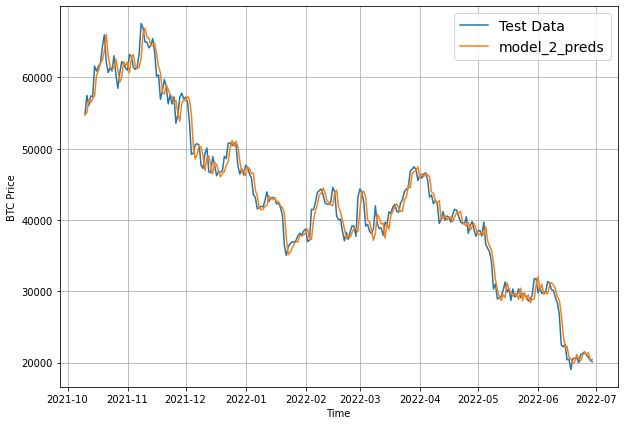

In [66]:
offset = 300
plt.figure(figsize=(10, 7))
# Account for test_window offset when plotting
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, format="-", label="Test Data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_2_preds, start=offset, format="-", label="model_2_preds")

## Model 3: Dense (window = 30, horizon = 7)

In [67]:
prices[:10]

array([457.334015, 424.440002, 394.79599 , 408.903992, 398.821014,
       402.152008, 435.790985, 423.204987, 411.574005, 404.424988])

In [68]:
HORIZON = 7
WINDOW_SIZE = 30

full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2807, 2807)

In [69]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows,
                                                                                labels=full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2245, 562, 2245, 562)

In [70]:
tf.random.set_seed(42)

# Create model (same as model_1 except with different data input and output sizes)
model_3 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON)
], name="model_3_dense")

# Compile
model_3.compile(loss="MAE",
                optimizer=tf.keras.optimizers.Adam())

# Fit
model_3.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_3.name)])

INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: mod

In [71]:
# Evaluate the model on the test data
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 2688.1917


2688.191650390625

In [72]:
# Load best version of model_3 and evaluate
model_3 = tf.keras.models.load_model("model_experiments/model_3_dense")
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 2688.1917


2688.191650390625

In [73]:
# Make predictions with model_3
model_3_preds = make_preds(model_3,
                           input_data=test_windows)
model_3_preds[:5]

<tf.Tensor: shape=(5, 7), dtype=float32, numpy=
array([[19278.293, 19030.188, 18979.527, 18862.707, 19426.31 , 18962.5  ,
        19097.615],
       [19049.62 , 19025.967, 18584.564, 18830.043, 18778.025, 18668.508,
        18874.236],
       [18334.938, 18346.822, 18038.451, 18117.334, 18260.55 , 18332.812,
        18120.416],
       [18046.322, 17806.418, 17698.209, 17459.545, 18157.865, 18219.729,
        17725.928],
       [18518.178, 18122.486, 18323.912, 18243.557, 18502.   , 18519.303,
        17932.549]], dtype=float32)>

In [74]:
model_2_results

{'mae': 1343.9061,
 'mape': 3.1932626,
 'mase': 1.073645,
 'mse': 3256637.0,
 'rmse': 1804.6155}

In [75]:
model_3_preds.shape, model_2_preds.shape, model_1_preds.shape

(TensorShape([562, 7]), TensorShape([563]), TensorShape([568]))

In [76]:
# Evaluate model_3 results (these are going multi-dimensional because we're trying to predict more than one timestep at a time)
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_3_preds)
model_3_results

{'mae': array([  479.5399 ,   848.0957 ,  1683.5951 ,  2678.4949 ,  2966.8103 ,
         3040.9563 ,  3318.4497 ,  3589.8452 ,  2571.3867 ,  1417.8156 ,
          777.24664,   855.3304 ,  1133.6501 ,  1501.007  ,  1802.2678 ,
         2703.2224 ,  3077.8508 ,  2794.9702 ,  2386.6462 ,  2549.7808 ,
         2721.6736 ,  3333.2693 ,  3474.981  ,  4317.497  ,  5290.9644 ,
         4446.147  ,  4534.323  ,  4684.466  ,  3612.0134 ,  2996.9348 ,
         2315.3538 ,  3753.9146 ,  5240.659  ,  4490.641  ,  2185.1511 ,
         1273.788  ,  1020.9157 ,  2922.932  ,  3806.4587 ,  4035.5706 ,
         3222.5515 ,  2587.0898 ,  2876.5845 ,  3737.8552 ,  1038.7502 ,
         1290.1998 ,  1325.6228 ,  1371.6964 ,  1662.5201 ,  2311.453  ,
         3991.9539 ,  3100.1152 ,  2519.6467 ,  2970.0918 ,  3208.429  ,
         5357.4956 ,  5671.3735 ,  5414.222  ,  5820.81   ,  6083.014  ,
         6786.215  ,  8193.882  ,  3773.9731 ,  1589.1908 ,  1919.7194 ,
         1363.7205 ,  2315.6284 ,  2751.194 

**Make our evaluation function work for larger horizons**

In [77]:
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 2688.1917


2688.191650390625

In [78]:
tf.reduce_mean(model_3_results["mae"]).numpy()

2688.1917

In [79]:
model_2_results["mae"].ndim

0

In [80]:
# Create a function to take in model predictions and truth values and return evaluation metrics
def evaluate_preds(y_true, y_pred):
  # Make sure float32 datatype (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various evaluation metrics 
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  # Account for different sized metrics (for longer horizons, we want to reduce metrics to a single value)
  if mae.ndim > 0:
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [81]:
# Get model_3 results aggregated to single values
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_3_preds)
model_3_results

{'mae': 2688.1917,
 'mape': 6.4473357,
 'mase': 2.1446307,
 'mse': 13029471.0,
 'rmse': 3079.5234}

In [82]:
model_3_preds[:5]

<tf.Tensor: shape=(5, 7), dtype=float32, numpy=
array([[19278.293, 19030.188, 18979.527, 18862.707, 19426.31 , 18962.5  ,
        19097.615],
       [19049.62 , 19025.967, 18584.564, 18830.043, 18778.025, 18668.508,
        18874.236],
       [18334.938, 18346.822, 18038.451, 18117.334, 18260.55 , 18332.812,
        18120.416],
       [18046.322, 17806.418, 17698.209, 17459.545, 18157.865, 18219.729,
        17725.928],
       [18518.178, 18122.486, 18323.912, 18243.557, 18502.   , 18519.303,
        17932.549]], dtype=float32)>

In [83]:
test_labels[:]

array([[18553.916016, 18264.992188, 18058.904297, ..., 19142.382813,
        19246.644531, 19417.076172],
       [18264.992188, 18058.904297, 18803.65625 , ..., 19246.644531,
        19417.076172, 21310.597656],
       [18058.904297, 18803.65625 , 19142.382813, ..., 19417.076172,
        21310.597656, 22805.162109],
       ...,
       [20710.597656, 19987.029297, 21085.876953, ..., 21502.337891,
        21027.294922, 20735.478516],
       [19987.029297, 21085.876953, 21231.65625 , ..., 21027.294922,
        20735.478516, 20280.634766],
       [21085.876953, 21231.65625 , 21502.337891, ..., 20735.478516,
        20280.634766, 20104.023438]])

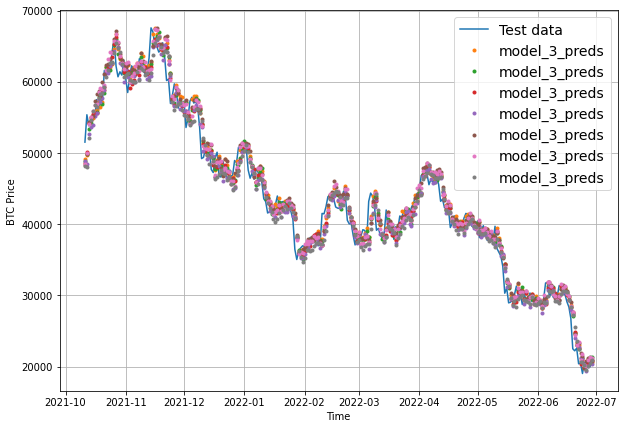

In [84]:
offset = 300
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, format="-", label="Test data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_3_preds, start=offset, label="model_3_preds")

In [85]:
model_3_preds[0]

<tf.Tensor: shape=(7,), dtype=float32, numpy=
array([19278.293, 19030.188, 18979.527, 18862.707, 19426.31 , 18962.5  ,
       19097.615], dtype=float32)>

In [86]:
tf.reduce_mean(model_3_preds[0])

<tf.Tensor: shape=(), dtype=float32, numpy=19091.021>

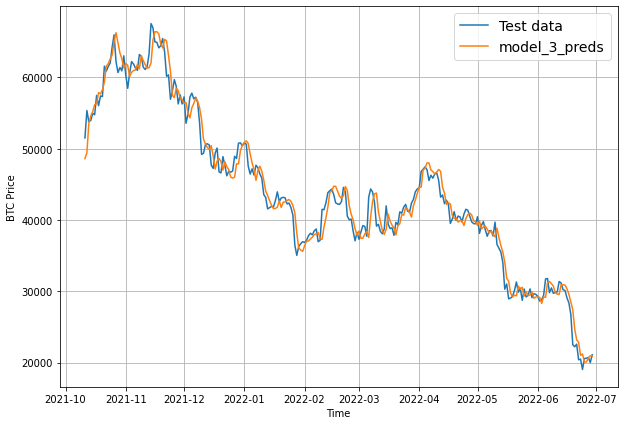

In [87]:
offset = 300
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):], 
                 values=test_labels[:, 0], 
                 start=offset, 
                 format="-",
                 label="Test data")
plot_time_series(timesteps=X_test[-len(test_windows):], 
                 values=tf.reduce_mean(model_3_preds, axis=1), 
                 start=offset,
                 format="-", 
                 label="model_3_preds")

**Which model is performing the best?**

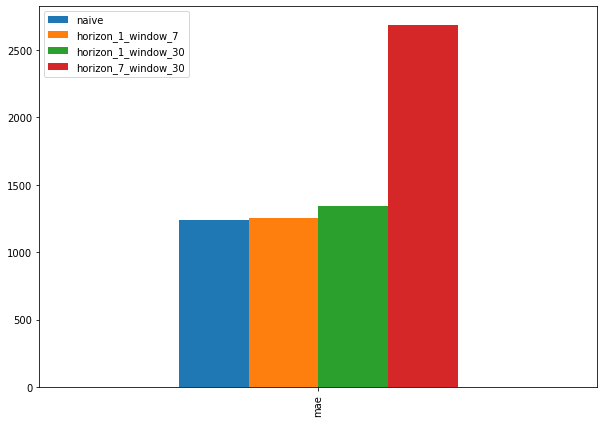

In [88]:
pd.DataFrame({"naive": naive_results["mae"],
              "horizon_1_window_7": model_1_results["mae"],
              "horizon_1_window_30": model_2_results["mae"],
              "horizon_7_window_30": model_3_results["mae"]}, index=["mae"]).plot(figsize=(10, 7), kind="bar");


Naive so far seems to be doing the best. This could be due to the pressence of autocorrelation in the data.  For more on how autocorrelation influences a model's predictions, see the article: https://towardsdatascience.com/how-not-to-use-machine-learning-for-time-series-forecasting-avoiding-the-pitfalls-19f9d7adf424

## Model 4: Conv1D

In [89]:
HORIZON = 1 # predict next day of Bitcoin prices
WINDOW_SIZE = 7 # use previous week worth data

In [90]:
# Create windowed data
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2836, 2836)

In [91]:
# Create train/test sets
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(train_labels), len(test_windows), len(test_labels)

(2268, 2268, 568, 568)

In [92]:
# Check data input shape
train_windows[0].shape # returns (WINDOW_SIZE, )

(7,)

To use the Conv1D layer, we need an input shape of: (batch_size, timesteps, input_dim)...

However our data isn't in that shape yet...

In [93]:
# Before we pass our data to the Conv1D layer, we have to reshape it in order to make sure it works
x = tf.constant(train_windows[0])
x

<tf.Tensor: shape=(7,), dtype=float64, numpy=
array([457.334015, 424.440002, 394.79599 , 408.903992, 398.821014,
       402.152008, 435.790985])>

In [94]:
expand_dims_layer = layers.Lambda(lambda x: tf.expand_dims(x, axis=1)) # add an extra dimension for `input_dim`

In [95]:
# Test out our lambda layer
print(f"Original shape: {x.shape}") # (WINDIW_SIZE)
print(f"Expanded shape: {expand_dims_layer(x).shape}") # output = ...?
print(f"Original values with expanded shape:\n {expand_dims_layer(x)}")

Original shape: (7,)
Expanded shape: (7, 1)
Original values with expanded shape:
 [[457.334]
 [424.44 ]
 [394.796]
 [408.904]
 [398.821]
 [402.152]
 [435.791]]


In [96]:
tf.random.set_seed(42)

# Create Conv1D model
model_4 = tf.keras.Sequential([
  layers.Lambda(lambda x: tf.expand_dims(x, axis=1)),
  layers.Conv1D(filters=128, kernel_size=5, strides=1, padding="causal", activation="relu"),
  layers.Dense(HORIZON)                      
], name="model_4_conv1D")

# Compile model
model_4.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit
model_4.fit(train_windows,
            train_labels,
            batch_size=128, 
            epochs=100,
            verbose=1,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_4.name)])

Epoch 1/100
18/18 [==============================] - 9s 44ms/step - loss: 1796.8889 - val_loss: 5830.9307
Epoch 2/100
18/18 [==============================] - 1s 35ms/step - loss: 466.1967 - val_loss: 2918.4031
Epoch 3/100
18/18 [==============================] - 1s 48ms/step - loss: 266.6869 - val_loss: 2240.8083
Epoch 4/100
18/18 [==============================] - 1s 36ms/step - loss: 240.2574 - val_loss: 2124.2063
Epoch 5/100
18/18 [==============================] - 1s 37ms/step - loss: 232.3010 - val_loss: 2096.3120
Epoch 6/100
18/18 [==============================] - 1s 36ms/step - loss: 229.4714 - val_loss: 2070.7380
Epoch 7/100
18/18 [==============================] - 0s 5ms/step - loss: 227.7997 - val_loss: 2078.5867
Epoch 8/100
18/18 [==============================] - 1s 36ms/step - loss: 224.2334 - val_loss: 2023.3574
Epoch 9/100
18/18 [==============================] - 1s 35ms/step - loss: 221.0209 - val_loss: 2011.0513
Epoch 10/100
18/18 [==============================] - 0

In [97]:
model_4.summary()

Model: "model_4_conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_1 (Lambda)           (None, 1, 7)              0         
                                                                 
 conv1d (Conv1D)             (None, 1, 128)            4608      
                                                                 
 dense_6 (Dense)             (None, 1, 1)              129       
                                                                 
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
_________________________________________________________________


In [98]:
# Evaluate model
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 1304.9023


1304.90234375

In [99]:
# Load back in best performing Conv1D and re-evaluate
model_4 = tf.keras.models.load_model("model_experiments/model_4_conv1D")
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1257.5205


1257.5205078125

In [100]:
# Make predictions
model_4_preds = make_preds(model_4, test_windows)
model_4_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([18511.938, 18545.166, 18349.826, 18115.328, 18675.61 , 19140.904,
       19278.812, 19444.285, 21031.795, 22618.57 ], dtype=float32)>

In [101]:
# Evaluate predictions
model_4_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_4_preds)
model_4_results

{'mae': 1257.5205,
 'mape': 3.0021358,
 'mase': 1.0111507,
 'mse': 2992751.0,
 'rmse': 1729.9569}

##Model 5: RNN (LSTM)

In [102]:
train_windows[:5]

array([[457.334015, 424.440002, 394.79599 , 408.903992, 398.821014,
        402.152008, 435.790985],
       [424.440002, 394.79599 , 408.903992, 398.821014, 402.152008,
        435.790985, 423.204987],
       [394.79599 , 408.903992, 398.821014, 402.152008, 435.790985,
        423.204987, 411.574005],
       [408.903992, 398.821014, 402.152008, 435.790985, 423.204987,
        411.574005, 404.424988],
       [398.821014, 402.152008, 435.790985, 423.204987, 411.574005,
        404.424988, 399.519989]])

In [103]:
tf.random.set_seed(42)

# Let's build an LSTM model with the Functional API
inputs = layers.Input(shape=(WINDOW_SIZE))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs)
# x = layers.LSTM(128, return_sequences=True)(x)
x = layers.LSTM(128, activation="relu")(x)
# x = layers.Dense(32, activation="relu")(x)
output = layers.Dense(HORIZON)(x)
model_5 = tf.keras.Model(inputs=inputs, outputs=output, name="model_5_LSTM")

# Compile
model_5.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit
model_5.fit(train_windows,
            train_labels,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_5.name)])

Epoch 1/100
10/18 [===============>..............] - ETA: 0s - loss: 3892.9824 INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 3s 109ms/step - loss: 3507.5686 - val_loss: 20910.8750
Epoch 2/100
11/18 [=================>............] - ETA: 0s - loss: 1625.1281INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 99ms/step - loss: 1208.3124 - val_loss: 2324.2192
Epoch 3/100
18/18 [==============================] - 0s 7ms/step - loss: 343.6159 - val_loss: 2338.7000
Epoch 4/100
12/18 [===================>..........] - ETA: 0s - loss: 265.8268INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 111ms/step - loss: 255.1220 - val_loss: 2215.6233
Epoch 5/100
12/18 [===================>..........] - ETA: 0s - loss: 225.4106INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 100ms/step - loss: 229.7898 - val_loss: 2099.5725
Epoch 6/100
12/18 [===================>..........] - ETA: 0s - loss: 225.9582INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 100ms/step - loss: 225.9765 - val_loss: 2064.6038
Epoch 7/100
18/18 [==============================] - 0s 7ms/step - loss: 224.1645 - val_loss: 2065.2812
Epoch 8/100
11/18 [=================>............] - ETA: 0s - loss: 228.3568INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 96ms/step - loss: 223.6853 - val_loss: 2051.3567
Epoch 9/100
12/18 [===================>..........] - ETA: 0s - loss: 229.9161INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 117ms/step - loss: 221.3924 - val_loss: 2042.2064
Epoch 10/100
12/18 [===================>..........] - ETA: 0s - loss: 228.4274INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 98ms/step - loss: 220.3559 - val_loss: 2019.3341
Epoch 11/100
18/18 [==============================] - 0s 7ms/step - loss: 218.9947 - val_loss: 2043.0145
Epoch 12/100
12/18 [===================>..........] - ETA: 0s - loss: 209.2318INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 98ms/step - loss: 216.4092 - val_loss: 1980.7585
Epoch 13/100
12/18 [===================>..........] - ETA: 0s - loss: 219.4999INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 112ms/step - loss: 215.0276 - val_loss: 1977.5475
Epoch 14/100
12/18 [===================>..........] - ETA: 0s - loss: 210.8459INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 99ms/step - loss: 213.1002 - val_loss: 1954.0312
Epoch 15/100
11/18 [=================>............] - ETA: 0s - loss: 207.7687INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 100ms/step - loss: 211.1172 - val_loss: 1923.6628
Epoch 16/100
11/18 [=================>............] - ETA: 0s - loss: 209.4015INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 100ms/step - loss: 209.9257 - val_loss: 1910.5044
Epoch 17/100
18/18 [==============================] - 0s 7ms/step - loss: 207.3730 - val_loss: 1947.4498
Epoch 18/100
12/18 [===================>..........] - ETA: 0s - loss: 192.6625INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 118ms/step - loss: 205.2591 - val_loss: 1880.1779
Epoch 19/100
11/18 [=================>............] - ETA: 0s - loss: 191.2685INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 101ms/step - loss: 203.7062 - val_loss: 1867.2865
Epoch 20/100
12/18 [===================>..........] - ETA: 0s - loss: 199.2336INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 97ms/step - loss: 200.9363 - val_loss: 1843.4244
Epoch 21/100
10/18 [===============>..............] - ETA: 0s - loss: 204.7313INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 100ms/step - loss: 198.9167 - val_loss: 1829.4349
Epoch 22/100
11/18 [=================>............] - ETA: 0s - loss: 200.7437INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 117ms/step - loss: 196.9508 - val_loss: 1806.7699
Epoch 23/100
10/18 [===============>..............] - ETA: 0s - loss: 203.0577INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 100ms/step - loss: 194.5193 - val_loss: 1799.2919
Epoch 24/100
11/18 [=================>............] - ETA: 0s - loss: 189.0660INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 100ms/step - loss: 192.6177 - val_loss: 1776.0516
Epoch 25/100
18/18 [==============================] - 0s 7ms/step - loss: 190.5528 - val_loss: 1779.9043
Epoch 26/100
12/18 [===================>..........] - ETA: 0s - loss: 190.3098INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 116ms/step - loss: 190.9130 - val_loss: 1730.9209
Epoch 27/100
18/18 [==============================] - ETA: 0s - loss: 187.1959INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 104ms/step - loss: 187.1959 - val_loss: 1724.8555
Epoch 28/100
11/18 [=================>............] - ETA: 0s - loss: 193.9371INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 100ms/step - loss: 184.4190 - val_loss: 1695.9956
Epoch 29/100
18/18 [==============================] - 0s 7ms/step - loss: 185.7453 - val_loss: 1700.1395
Epoch 30/100
12/18 [===================>..........] - ETA: 0s - loss: 182.4417INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 100ms/step - loss: 181.5782 - val_loss: 1663.1846
Epoch 31/100
11/18 [=================>............] - ETA: 0s - loss: 176.6069INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 122ms/step - loss: 179.0710 - val_loss: 1662.3678
Epoch 32/100
12/18 [===================>..........] - ETA: 0s - loss: 171.8786INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 101ms/step - loss: 177.6214 - val_loss: 1631.6243
Epoch 33/100
11/18 [=================>............] - ETA: 0s - loss: 174.9774INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 100ms/step - loss: 175.0643 - val_loss: 1621.4198
Epoch 34/100
11/18 [=================>............] - ETA: 0s - loss: 173.7674INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 120ms/step - loss: 172.6796 - val_loss: 1599.7328
Epoch 35/100
18/18 [==============================] - 0s 7ms/step - loss: 172.6054 - val_loss: 1658.8910
Epoch 36/100
18/18 [==============================] - 0s 7ms/step - loss: 172.7967 - val_loss: 1635.3605
Epoch 37/100
11/18 [=================>............] - ETA: 0s - loss: 168.8789INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 102ms/step - loss: 170.0961 - val_loss: 1583.8940
Epoch 38/100
12/18 [===================>..........] - ETA: 0s - loss: 167.1694INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 104ms/step - loss: 168.0287 - val_loss: 1551.1707
Epoch 39/100
11/18 [=================>............] - ETA: 0s - loss: 164.2025INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 97ms/step - loss: 168.2245 - val_loss: 1537.5637
Epoch 40/100
11/18 [=================>............] - ETA: 0s - loss: 168.3804INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 120ms/step - loss: 164.0784 - val_loss: 1521.1809
Epoch 41/100
18/18 [==============================] - 0s 6ms/step - loss: 165.8667 - val_loss: 1587.2928
Epoch 42/100
11/18 [=================>............] - ETA: 0s - loss: 163.4260INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 100ms/step - loss: 163.7730 - val_loss: 1515.0968
Epoch 43/100
11/18 [=================>............] - ETA: 0s - loss: 163.4772INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 101ms/step - loss: 160.7582 - val_loss: 1496.6099
Epoch 44/100
11/18 [=================>............] - ETA: 0s - loss: 158.6311INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 99ms/step - loss: 160.0913 - val_loss: 1481.5383
Epoch 45/100
18/18 [==============================] - 0s 7ms/step - loss: 159.3984 - val_loss: 1494.3417
Epoch 46/100
12/18 [===================>..........] - ETA: 0s - loss: 159.0548INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 119ms/step - loss: 157.0616 - val_loss: 1474.6963
Epoch 47/100
18/18 [==============================] - 0s 6ms/step - loss: 158.7271 - val_loss: 1496.0592
Epoch 48/100
11/18 [=================>............] - ETA: 0s - loss: 162.0887INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 97ms/step - loss: 162.3471 - val_loss: 1469.0704
Epoch 49/100
12/18 [===================>..........] - ETA: 0s - loss: 171.1761INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 99ms/step - loss: 158.8614 - val_loss: 1451.2112
Epoch 50/100
18/18 [==============================] - 0s 7ms/step - loss: 157.6541 - val_loss: 1459.0834
Epoch 51/100
12/18 [===================>..........] - ETA: 0s - loss: 156.1587INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 116ms/step - loss: 154.1198 - val_loss: 1435.3397
Epoch 52/100
11/18 [=================>............] - ETA: 0s - loss: 143.6372INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 99ms/step - loss: 154.9921 - val_loss: 1431.8677
Epoch 53/100
11/18 [=================>............] - ETA: 0s - loss: 155.2083INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 99ms/step - loss: 152.1670 - val_loss: 1423.7094
Epoch 54/100
12/18 [===================>..........] - ETA: 0s - loss: 152.5901INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 99ms/step - loss: 152.3461 - val_loss: 1418.3224
Epoch 55/100
18/18 [==============================] - 0s 7ms/step - loss: 155.3826 - val_loss: 1433.9159
Epoch 56/100
18/18 [==============================] - 0s 7ms/step - loss: 153.0457 - val_loss: 1469.6750
Epoch 57/100
18/18 [==============================] - 0s 7ms/step - loss: 152.9862 - val_loss: 1449.0988
Epoch 58/100
10/18 [===============>..............] - ETA: 0s - loss: 149.8667INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 118ms/step - loss: 152.4129 - val_loss: 1401.5896
Epoch 59/100
18/18 [==============================] - 0s 8ms/step - loss: 149.7845 - val_loss: 1417.8770
Epoch 60/100
18/18 [==============================] - 0s 7ms/step - loss: 150.0557 - val_loss: 1427.1968
Epoch 61/100
12/18 [===================>..........] - ETA: 0s - loss: 150.4184INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 99ms/step - loss: 150.6212 - val_loss: 1391.7596
Epoch 62/100
11/18 [=================>............] - ETA: 0s - loss: 151.0123INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 98ms/step - loss: 149.7981 - val_loss: 1388.7168
Epoch 63/100
18/18 [==============================] - 0s 7ms/step - loss: 149.6838 - val_loss: 1390.7529
Epoch 64/100
11/18 [=================>............] - ETA: 0s - loss: 145.8328INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 120ms/step - loss: 148.7544 - val_loss: 1382.8950
Epoch 65/100
18/18 [==============================] - 0s 7ms/step - loss: 147.9350 - val_loss: 1383.9657
Epoch 66/100
18/18 [==============================] - 0s 7ms/step - loss: 151.1752 - val_loss: 1392.4099
Epoch 67/100
11/18 [=================>............] - ETA: 0s - loss: 150.8640INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 100ms/step - loss: 148.7592 - val_loss: 1380.6680
Epoch 68/100
11/18 [=================>............] - ETA: 0s - loss: 148.2414INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 102ms/step - loss: 148.3297 - val_loss: 1373.2919
Epoch 69/100
12/18 [===================>..........] - ETA: 0s - loss: 152.4398INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 100ms/step - loss: 147.3499 - val_loss: 1370.9978
Epoch 70/100
18/18 [==============================] - 0s 7ms/step - loss: 148.5315 - val_loss: 1451.2009
Epoch 71/100
11/18 [=================>............] - ETA: 0s - loss: 161.8627INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 118ms/step - loss: 149.3496 - val_loss: 1368.0641
Epoch 72/100
18/18 [==============================] - 0s 6ms/step - loss: 145.9365 - val_loss: 1386.0742
Epoch 73/100
11/18 [=================>............] - ETA: 0s - loss: 144.0817INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 99ms/step - loss: 145.1145 - val_loss: 1363.0441
Epoch 74/100
18/18 [==============================] - 0s 8ms/step - loss: 146.3776 - val_loss: 1365.1986
Epoch 75/100
11/18 [=================>............] - ETA: 0s - loss: 148.5839INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 98ms/step - loss: 146.0302 - val_loss: 1359.5258
Epoch 76/100
18/18 [==============================] - 0s 7ms/step - loss: 144.6945 - val_loss: 1360.1349
Epoch 77/100
18/18 [==============================] - 0s 6ms/step - loss: 145.0659 - val_loss: 1360.1462
Epoch 78/100
18/18 [==============================] - 0s 7ms/step - loss: 144.7148 - val_loss: 1376.2596
Epoch 79/100
18/18 [==============================] - 0s 6ms/step - loss: 145.3624 - val_loss: 1376.2782
Epoch 80/100
18/18 [==============================] - 0s 7ms/step - loss: 150.6392 - val_loss: 1446.5718
Epoch 81/100
18/18 [==============================] - 0s 7ms/step - loss: 148.8868 - val_loss: 1364.2723
Epoch 82/100
18/18 [==============================] - 0s 7ms/step - loss: 146.6203 - val_loss: 1393.4559
Epoch 83/100
12/18 [===================>..........] - ETA: 0s - loss: 146.7693INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 100ms/step - loss: 147.8242 - val_loss: 1347.4618
Epoch 84/100
18/18 [==============================] - 0s 7ms/step - loss: 146.0161 - val_loss: 1386.2346
Epoch 85/100
12/18 [===================>..........] - ETA: 0s - loss: 143.3236INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 119ms/step - loss: 144.7548 - val_loss: 1346.3872
Epoch 86/100
11/18 [=================>............] - ETA: 0s - loss: 144.6414INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 102ms/step - loss: 143.4482 - val_loss: 1342.5542
Epoch 87/100
18/18 [==============================] - 0s 7ms/step - loss: 143.3990 - val_loss: 1344.7770
Epoch 88/100
11/18 [=================>............] - ETA: 0s - loss: 139.2009INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 100ms/step - loss: 142.7428 - val_loss: 1339.1332
Epoch 89/100
18/18 [==============================] - 0s 7ms/step - loss: 145.2429 - val_loss: 1391.8394
Epoch 90/100
11/18 [=================>............] - ETA: 0s - loss: 150.3542INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 117ms/step - loss: 145.3133 - val_loss: 1335.9401
Epoch 91/100
18/18 [==============================] - 0s 6ms/step - loss: 142.7764 - val_loss: 1336.0225
Epoch 92/100
12/18 [===================>..........] - ETA: 0s - loss: 139.3531INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 102ms/step - loss: 142.5824 - val_loss: 1332.5210
Epoch 93/100
18/18 [==============================] - 0s 7ms/step - loss: 141.5559 - val_loss: 1332.7502
Epoch 94/100
10/18 [===============>..............] - ETA: 0s - loss: 148.6864INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 99ms/step - loss: 142.1749 - val_loss: 1330.4670
Epoch 95/100
18/18 [==============================] - 0s 8ms/step - loss: 142.7918 - val_loss: 1346.7124
Epoch 96/100
11/18 [=================>............] - ETA: 0s - loss: 139.9212INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 118ms/step - loss: 142.5785 - val_loss: 1328.6891
Epoch 97/100
18/18 [==============================] - 0s 7ms/step - loss: 141.9383 - val_loss: 1369.2050
Epoch 98/100
11/18 [=================>............] - ETA: 0s - loss: 140.3321INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 102ms/step - loss: 141.8380 - val_loss: 1325.3831
Epoch 99/100
12/18 [===================>..........] - ETA: 0s - loss: 142.8498INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 102ms/step - loss: 144.3511 - val_loss: 1322.8442
Epoch 100/100
18/18 [==============================] - 0s 7ms/step - loss: 144.2131 - val_loss: 1327.9430


In [104]:
# Load in best version of model 5 and evaluate on the test data
model_5 = tf.keras.models.load_model("model_experiments/model_5_LSTM")
model_5.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1322.8442


1322.84423828125

In [105]:
# Make prediction with our LSTM model
model_5_preds = make_preds(model_5, test_windows)
model_5_preds[:5]

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([18562.406, 18543.174, 18363.453, 18103.72 , 18483.01 ],
      dtype=float32)>

In [106]:
# Evaluate model 5 predictions
model_5_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_5_preds)
model_5_results

{'mae': 1322.8444,
 'mape': 3.162112,
 'mase': 1.0636766,
 'mse': 3180426.8,
 'rmse': 1783.3751}

## Model 6: Dense (multivariate time series)

We could try adding in new features to see how it affects our prediction. Let's take a look at bitcoin halving events: https://www.cmcmarkets.com/en/learn-cryptocurrencies/bitcoin-halving

In [107]:
# Let's make a multivariate time series 
bitcoin_prices.head()

,Price
Date,
2014-09-17,457.334015
2014-09-18,424.440002
2014-09-19,394.795990
2014-09-20,408.903992
2014-09-21,398.821014


In [108]:
# Let's add the bitcoin halving events to our dataset
block_reward_1 = 50 # 3 January 2009 - this block reward isn't in our dataset range (our data starts from 15 September 2014)
block_reward_2 = 25 # 8 November 2012 
block_reward_3 = 12.5 # 9 July 2016
block_reward_4 = 6.25 # 18 May 2020

# Block reward dates
block_reward_2_datetime = np.datetime64("2012-11-28")
block_reward_3_datetime = np.datetime64("2016-07-09")
block_reward_4_datetime = np.datetime64("2020-05-18")

In [109]:
# Create date ranges of where specific block_reward values should be
block_reward_2_days = (block_reward_3_datetime - bitcoin_prices.index[0]).days
block_reward_3_days = (block_reward_4_datetime - bitcoin_prices.index[0]).days
block_reward_2_days, block_reward_3_days

(661, 2070)

In [110]:
# Add in a block_reward column
bitcoin_prices_block = bitcoin_prices.copy()
bitcoin_prices_block["block_reward"] = None

# Add in block_reward values as a feature to our dataframe
bitcoin_prices_block.iloc[:block_reward_2_days, -1] = block_reward_2
bitcoin_prices_block.iloc[block_reward_2_days:block_reward_3_days, -1] = block_reward_3
bitcoin_prices_block.iloc[block_reward_3_days:, -1] = block_reward_4

In [111]:
bitcoin_prices_block.head()

,Price,block_reward
Date,,
2014-09-17,457.334015,25
2014-09-18,424.440002,25
2014-09-19,394.795990,25
2014-09-20,408.903992,25
2014-09-21,398.821014,25


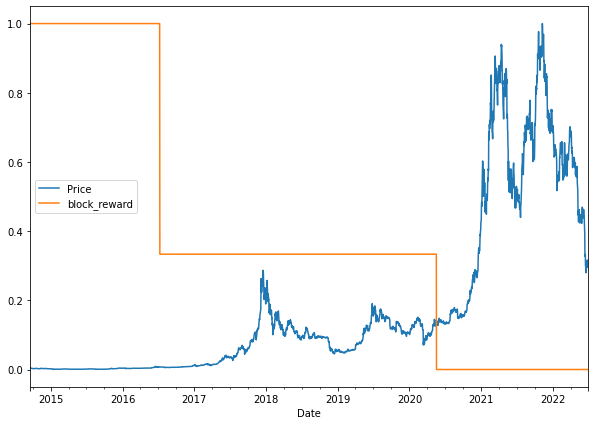

In [112]:
# Plot the block reward vs price over time
from sklearn.preprocessing import minmax_scale
scaled_price_block_df = pd.DataFrame(minmax_scale(bitcoin_prices_block[["Price", "block_reward"]]),
                                                                       columns=bitcoin_prices_block.columns,
                                                                       index=bitcoin_prices_block.index)
scaled_price_block_df.plot(figsize=(10, 7));

Previously, we've turned our univariate time series into windowed dataset using the helper functions above.

However, since we've got multivariate data, these functions won't work.

Not to worry, we can use the pandas.DataFrame.shift() method to window our multivariate data. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shift.html

In [113]:
# Setup dataset hyperparameters
HORIZON = 1
WINDOW_SIZE = 7

In [114]:
# Make a copy of the Bitcoin historical data with block reward feature
bitcoin_prices_windowed = bitcoin_prices_block.copy()

# Add windowed columns
for i in range(WINDOW_SIZE): # shift values for each step in WINDOW_SIZE
  bitcoin_prices_windowed[f"Price+{i+1}"] = bitcoin_prices_windowed["Price"].shift(periods=i+1)
bitcoin_prices_windowed.head(10)


,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2014-09-17,457.334015,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-18,424.440002,25,457.334015,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-19,394.795990,25,424.440002,457.334015,NaN,NaN,NaN,NaN,NaN
2014-09-20,408.903992,25,394.795990,424.440002,457.334015,NaN,NaN,NaN,NaN
2014-09-21,398.821014,25,408.903992,394.795990,424.440002,457.334015,NaN,NaN,NaN
2014-09-22,402.152008,25,398.821014,408.903992,394.795990,424.440002,457.334015,NaN,NaN
2014-09-23,435.790985,25,402.152008,398.821014,408.903992,394.795990,424.440002,457.334015,NaN
2014-09-24,423.204987,25,435.790985,402.152008,398.821014,408.903992,394.795990,424.440002,457.334015
2014-09-25,411.574005,25,423.204987,435.790985,402.152008,398.821014,408.903992,394.795990,424.440002


In [115]:
bitcoin_prices_windowed.tail()

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2022-06-25,21502.337891,6.25,21231.656250,21085.876953,19987.029297,20710.597656,20599.537109,20553.271484,19017.642578
2022-06-26,21027.294922,6.25,21502.337891,21231.656250,21085.876953,19987.029297,20710.597656,20599.537109,20553.271484
2022-06-27,20735.478516,6.25,21027.294922,21502.337891,21231.656250,21085.876953,19987.029297,20710.597656,20599.537109
2022-06-28,20280.634766,6.25,20735.478516,21027.294922,21502.337891,21231.656250,21085.876953,19987.029297,20710.597656
2022-06-29,20104.023438,6.25,20280.634766,20735.478516,21027.294922,21502.337891,21231.656250,21085.876953,19987.029297


In [116]:
# Create X (windows) and y (horizons) features
X = bitcoin_prices_windowed.dropna().drop("Price", axis=1).astype(np.float32)
y = bitcoin_prices_windowed.dropna()["Price"].astype(np.float32)
X.head()

,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2014-09-24,25.0,435.790985,402.152008,398.821014,408.903992,394.795990,424.440002,457.334015
2014-09-25,25.0,423.204987,435.790985,402.152008,398.821014,408.903992,394.795990,424.440002
2014-09-26,25.0,411.574005,423.204987,435.790985,402.152008,398.821014,408.903992,394.795990
2014-09-27,25.0,404.424988,411.574005,423.204987,435.790985,402.152008,398.821014,408.903992
2014-09-28,25.0,399.519989,404.424988,411.574005,423.204987,435.790985,402.152008,398.821014


In [117]:
y.head()

Date
2014-09-24    423.204987
2014-09-25    411.574005
2014-09-26    404.424988
2014-09-27    399.519989
2014-09-28    377.181000
Name: Price, dtype: float32

In [118]:
# Make train and test sets using indexing
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2268, 2268, 568, 568)

In [119]:

tf.random.set_seed(42)

# Make multivariate time series model
model_6 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  # layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON)                          
], name="model_6_dense_multivariate")

# Compile
model_6.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit
model_6.fit(X_train, y_train,
            epochs=100,
            batch_size=128,
            verbose=1,
            validation_data=(X_test, y_test),
            callbacks=[create_model_checkpoint(model_name=model_6.name)])

Epoch 1/100
 1/18 [>.............................] - ETA: 5s - loss: 3606.8008INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 49ms/step - loss: 1828.6588 - val_loss: 5213.1733
Epoch 2/100
 1/18 [>.............................] - ETA: 0s - loss: 525.7946INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 26ms/step - loss: 495.0459 - val_loss: 3386.9116
Epoch 3/100
 1/18 [>.............................] - ETA: 0s - loss: 358.2490INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 26ms/step - loss: 304.0099 - val_loss: 2465.4207
Epoch 4/100
 1/18 [>.............................] - ETA: 0s - loss: 245.0047INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 25ms/step - loss: 276.5000 - val_loss: 2441.4690
Epoch 5/100
 1/18 [>.............................] - ETA: 0s - loss: 262.8052INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 26ms/step - loss: 265.3836 - val_loss: 2360.3501
Epoch 6/100
 1/18 [>.............................] - ETA: 0s - loss: 246.2833INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 26ms/step - loss: 259.2237 - val_loss: 2311.8186
Epoch 7/100
18/18 [==============================] - 0s 4ms/step - loss: 255.1870 - val_loss: 2332.9363
Epoch 8/100
 1/18 [>.............................] - ETA: 0s - loss: 208.8797INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 25ms/step - loss: 248.1180 - val_loss: 2188.5374
Epoch 9/100
 1/18 [>.............................] - ETA: 0s - loss: 265.1071INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 25ms/step - loss: 236.6830 - val_loss: 2125.1230
Epoch 10/100
 1/18 [>.............................] - ETA: 0s - loss: 173.6981INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 25ms/step - loss: 228.2031 - val_loss: 2059.6492
Epoch 11/100
 1/18 [>.............................] - ETA: 0s - loss: 255.3028INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 25ms/step - loss: 220.3137 - val_loss: 1931.1818
Epoch 12/100
 1/18 [>.............................] - ETA: 0s - loss: 259.3245INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 24ms/step - loss: 209.6887 - val_loss: 1864.7749
Epoch 13/100
 1/18 [>.............................] - ETA: 0s - loss: 174.8412INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 25ms/step - loss: 201.8986 - val_loss: 1815.1523
Epoch 14/100
 1/18 [>.............................] - ETA: 0s - loss: 204.2912INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 25ms/step - loss: 195.0289 - val_loss: 1772.9855
Epoch 15/100
 1/18 [>.............................] - ETA: 0s - loss: 174.2205INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 26ms/step - loss: 186.2714 - val_loss: 1686.0153
Epoch 16/100
 1/18 [>.............................] - ETA: 0s - loss: 135.9471INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 25ms/step - loss: 180.9471 - val_loss: 1636.4409
Epoch 17/100
 1/18 [>.............................] - ETA: 0s - loss: 157.5477INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 25ms/step - loss: 175.9695 - val_loss: 1593.5315
Epoch 18/100
18/18 [==============================] - 0s 4ms/step - loss: 173.1140 - val_loss: 1611.3076
Epoch 19/100
 1/18 [>.............................] - ETA: 0s - loss: 146.0512INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 26ms/step - loss: 176.7712 - val_loss: 1568.7814
Epoch 20/100
 1/18 [>.............................] - ETA: 0s - loss: 153.8835INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 26ms/step - loss: 167.6849 - val_loss: 1516.9922
Epoch 21/100
 1/18 [>.............................] - ETA: 0s - loss: 170.7681INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 25ms/step - loss: 163.9613 - val_loss: 1487.3567
Epoch 22/100
 1/18 [>.............................] - ETA: 0s - loss: 193.5229INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 25ms/step - loss: 160.5251 - val_loss: 1486.6621
Epoch 23/100
18/18 [==============================] - 0s 4ms/step - loss: 155.9260 - val_loss: 1486.7939
Epoch 24/100
 1/18 [>.............................] - ETA: 0s - loss: 119.0441INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 25ms/step - loss: 155.1980 - val_loss: 1405.0966
Epoch 25/100
 1/18 [>.............................] - ETA: 0s - loss: 163.1038INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 25ms/step - loss: 151.6739 - val_loss: 1395.9548
Epoch 26/100
 1/18 [>.............................] - ETA: 0s - loss: 147.0717INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 41ms/step - loss: 154.1242 - val_loss: 1388.6852
Epoch 27/100
18/18 [==============================] - 0s 4ms/step - loss: 163.8056 - val_loss: 1459.9495
Epoch 28/100
18/18 [==============================] - 0s 4ms/step - loss: 161.0263 - val_loss: 1601.2695
Epoch 29/100
18/18 [==============================] - 0s 4ms/step - loss: 169.6913 - val_loss: 1543.4268
Epoch 30/100
 1/18 [>.............................] - ETA: 0s - loss: 150.7784INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 25ms/step - loss: 155.0246 - val_loss: 1356.8354
Epoch 31/100
18/18 [==============================] - 0s 3ms/step - loss: 147.6754 - val_loss: 1367.0560
Epoch 32/100
18/18 [==============================] - 0s 4ms/step - loss: 148.1496 - val_loss: 1387.8789
Epoch 33/100
18/18 [==============================] - 0s 4ms/step - loss: 149.1614 - val_loss: 1385.5493
Epoch 34/100
 1/18 [>.............................] - ETA: 0s - loss: 187.9812INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 24ms/step - loss: 152.0471 - val_loss: 1351.2576
Epoch 35/100
 1/18 [>.............................] - ETA: 0s - loss: 117.3978INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 24ms/step - loss: 144.7613 - val_loss: 1337.2323
Epoch 36/100
 1/18 [>.............................] - ETA: 0s - loss: 160.6814INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 25ms/step - loss: 146.7386 - val_loss: 1326.0665
Epoch 37/100
 1/18 [>.............................] - ETA: 0s - loss: 188.3865INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 25ms/step - loss: 142.3179 - val_loss: 1321.8010
Epoch 38/100
 1/18 [>.............................] - ETA: 0s - loss: 129.9572INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 24ms/step - loss: 145.6265 - val_loss: 1318.8286
Epoch 39/100
18/18 [==============================] - 0s 3ms/step - loss: 150.8295 - val_loss: 1391.9271
Epoch 40/100
18/18 [==============================] - 0s 3ms/step - loss: 143.7088 - val_loss: 1328.2272
Epoch 41/100
 1/18 [>.............................] - ETA: 0s - loss: 151.3083INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 25ms/step - loss: 140.4097 - val_loss: 1308.2538
Epoch 42/100
18/18 [==============================] - 0s 4ms/step - loss: 141.6036 - val_loss: 1311.8588
Epoch 43/100
18/18 [==============================] - 0s 5ms/step - loss: 139.9496 - val_loss: 1312.9222
Epoch 44/100
 1/18 [>.............................] - ETA: 0s - loss: 138.1500INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 25ms/step - loss: 140.2838 - val_loss: 1303.1018
Epoch 45/100
18/18 [==============================] - 0s 4ms/step - loss: 140.2470 - val_loss: 1332.2365
Epoch 46/100
 1/18 [>.............................] - ETA: 0s - loss: 135.7704INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 24ms/step - loss: 142.8178 - val_loss: 1290.8528
Epoch 47/100
18/18 [==============================] - 0s 4ms/step - loss: 145.3365 - val_loss: 1297.3849
Epoch 48/100
18/18 [==============================] - 0s 4ms/step - loss: 144.7277 - val_loss: 1358.6840
Epoch 49/100
18/18 [==============================] - 0s 4ms/step - loss: 148.3856 - val_loss: 1451.3004
Epoch 50/100
 1/18 [>.............................] - ETA: 0s - loss: 169.7354INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 24ms/step - loss: 146.9346 - val_loss: 1284.9332
Epoch 51/100
 1/18 [>.............................] - ETA: 0s - loss: 159.4109INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 25ms/step - loss: 140.1186 - val_loss: 1280.6000
Epoch 52/100
18/18 [==============================] - 0s 4ms/step - loss: 140.7597 - val_loss: 1300.5865
Epoch 53/100
18/18 [==============================] - 0s 4ms/step - loss: 147.7209 - val_loss: 1297.7433
Epoch 54/100
 1/18 [>.............................] - ETA: 0s - loss: 147.4418INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 25ms/step - loss: 139.0208 - val_loss: 1280.2053
Epoch 55/100
 1/18 [>.............................] - ETA: 0s - loss: 139.5498INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 25ms/step - loss: 145.1496 - val_loss: 1276.7423
Epoch 56/100
 1/18 [>.............................] - ETA: 0s - loss: 123.9026INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 25ms/step - loss: 138.6105 - val_loss: 1274.0201
Epoch 57/100
18/18 [==============================] - 0s 4ms/step - loss: 141.2398 - val_loss: 1288.5366
Epoch 58/100
18/18 [==============================] - 0s 5ms/step - loss: 138.7094 - val_loss: 1329.9310
Epoch 59/100
18/18 [==============================] - 0s 4ms/step - loss: 140.7133 - val_loss: 1300.5077
Epoch 60/100
18/18 [==============================] - 0s 4ms/step - loss: 143.0972 - val_loss: 1344.5018
Epoch 61/100
18/18 [==============================] - 0s 4ms/step - loss: 138.8732 - val_loss: 1278.8376
Epoch 62/100
18/18 [==============================] - 0s 4ms/step - loss: 143.2334 - val_loss: 1321.9875
Epoch 63/100
 1/18 [>.............................] - ETA: 0s - loss: 127.2484INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 25ms/step - loss: 137.5994 - val_loss: 1266.5878
Epoch 64/100
18/18 [==============================] - 0s 4ms/step - loss: 137.0063 - val_loss: 1268.6195
Epoch 65/100
 1/18 [>.............................] - ETA: 0s - loss: 127.9765INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 24ms/step - loss: 136.2903 - val_loss: 1265.6278
Epoch 66/100
 1/18 [>.............................] - ETA: 0s - loss: 132.4585INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 25ms/step - loss: 139.3516 - val_loss: 1263.3912
Epoch 67/100
18/18 [==============================] - 0s 4ms/step - loss: 140.2906 - val_loss: 1264.6127
Epoch 68/100
18/18 [==============================] - 0s 4ms/step - loss: 137.2720 - val_loss: 1308.0874
Epoch 69/100
18/18 [==============================] - 0s 4ms/step - loss: 137.4872 - val_loss: 1306.0869
Epoch 70/100
 1/18 [>.............................] - ETA: 0s - loss: 149.7241INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 26ms/step - loss: 135.8195 - val_loss: 1260.2046
Epoch 71/100
18/18 [==============================] - 0s 4ms/step - loss: 139.7143 - val_loss: 1289.7450
Epoch 72/100
18/18 [==============================] - 0s 4ms/step - loss: 146.0593 - val_loss: 1355.9767
Epoch 73/100
18/18 [==============================] - 0s 6ms/step - loss: 143.1391 - val_loss: 1316.5667
Epoch 74/100
 1/18 [>.............................] - ETA: 0s - loss: 114.6914INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 40ms/step - loss: 142.4787 - val_loss: 1260.1200
Epoch 75/100
18/18 [==============================] - 0s 4ms/step - loss: 138.0182 - val_loss: 1261.5686
Epoch 76/100
18/18 [==============================] - 0s 5ms/step - loss: 138.1153 - val_loss: 1315.6240
Epoch 77/100
18/18 [==============================] - 0s 4ms/step - loss: 142.5022 - val_loss: 1326.3678
Epoch 78/100
18/18 [==============================] - 0s 4ms/step - loss: 142.6351 - val_loss: 1339.9617
Epoch 79/100
18/18 [==============================] - 0s 4ms/step - loss: 137.3362 - val_loss: 1339.6831
Epoch 80/100
18/18 [==============================] - 0s 4ms/step - loss: 141.1151 - val_loss: 1293.2839
Epoch 81/100
 1/18 [>.............................] - ETA: 0s - loss: 95.0219INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 24ms/step - loss: 135.8824 - val_loss: 1257.8528
Epoch 82/100
18/18 [==============================] - 0s 4ms/step - loss: 136.7625 - val_loss: 1285.5662
Epoch 83/100
 1/18 [>.............................] - ETA: 0s - loss: 127.0253INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 25ms/step - loss: 135.7418 - val_loss: 1257.0172
Epoch 84/100
 1/18 [>.............................] - ETA: 0s - loss: 146.0812INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 26ms/step - loss: 140.3141 - val_loss: 1256.0724
Epoch 85/100
18/18 [==============================] - 0s 4ms/step - loss: 139.2509 - val_loss: 1398.2664
Epoch 86/100
18/18 [==============================] - 0s 4ms/step - loss: 144.2059 - val_loss: 1258.7408
Epoch 87/100
18/18 [==============================] - 0s 4ms/step - loss: 136.5896 - val_loss: 1257.9071
Epoch 88/100
 1/18 [>.............................] - ETA: 0s - loss: 132.5205INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 25ms/step - loss: 138.7021 - val_loss: 1254.1477
Epoch 89/100
18/18 [==============================] - 0s 4ms/step - loss: 137.1789 - val_loss: 1267.2421
Epoch 90/100
18/18 [==============================] - 0s 4ms/step - loss: 144.7303 - val_loss: 1255.5292
Epoch 91/100
18/18 [==============================] - 0s 4ms/step - loss: 136.0728 - val_loss: 1314.7374
Epoch 92/100
18/18 [==============================] - 0s 4ms/step - loss: 135.5863 - val_loss: 1259.5161
Epoch 93/100
18/18 [==============================] - 0s 5ms/step - loss: 134.7333 - val_loss: 1261.6527
Epoch 94/100
18/18 [==============================] - 0s 3ms/step - loss: 136.5647 - val_loss: 1257.1611
Epoch 95/100
 1/18 [>.............................] - ETA: 0s - loss: 119.8379INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 25ms/step - loss: 135.0749 - val_loss: 1253.0225
Epoch 96/100
18/18 [==============================] - 0s 4ms/step - loss: 136.7340 - val_loss: 1256.0897
Epoch 97/100
18/18 [==============================] - 0s 4ms/step - loss: 135.2047 - val_loss: 1264.4731
Epoch 98/100
18/18 [==============================] - 0s 4ms/step - loss: 136.3204 - val_loss: 1348.5542
Epoch 99/100
18/18 [==============================] - 0s 4ms/step - loss: 138.8360 - val_loss: 1256.0432
Epoch 100/100
18/18 [==============================] - 0s 3ms/step - loss: 136.9826 - val_loss: 1287.8049


In [120]:
# Evaluate multivariate model
model_6.evaluate(X_test, y_test)

18/18 [==============================] - 0s 2ms/step - loss: 1287.8049


1287.804931640625

In [121]:
# Load in and evaluate best performing model
model_6 = tf.keras.models.load_model("model_experiments/model_6_dense_multivariate")
model_6.evaluate(X_test, y_test)

18/18 [==============================] - 0s 2ms/step - loss: 1253.0226


1253.0225830078125

In [122]:
# Make predictions with multivariate model
model_6_preds = tf.squeeze(model_6.predict(X_test))
model_6_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([18443.596, 18557.541, 18315.613, 18042.404, 18709.822, 19152.723,
       19230.402, 19449.855, 21130.672, 22645.799], dtype=float32)>

In [123]:
# Evaluate predictions to get eval metrics
model_6_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_6_preds)
model_6_results

{'mae': 1253.0226,
 'mape': 2.9874258,
 'mase': 1.007534,
 'mse': 2954998.5,
 'rmse': 1719.0109}

In [124]:
model_1_results

{'mae': 1255.478,
 'mape': 2.9978268,
 'mase': 1.0095085,
 'mse': 2976047.2,
 'rmse': 1725.1224}

##Model 7: N-BEATS algorithm

We're going to be replicating the algorithm in Figure 1 from the following paper: https://arxiv.org/pdf/1905.10437.pdf

To create custom layers and models in TensorFlow we can use subclassing: https://www.tensorflow.org/guide/keras/custom_layers_and_models

In [125]:
# Create NBeatBlock custom layer
class NBeatsBlock(tf.keras.layers.Layer):
  def __init__(self, 
               input_size: int,
               theta_size: int,
               horizon: int,
               n_neurons: int,
               n_layers: int,
               **kwargs): # the **kwargs argument takes care of all the arguments for the parent class (input_shape, trainable, name)
    super().__init__(**kwargs)
    self.input_size = input_size
    self.theta_size = theta_size
    self.horizon = horizon
    self.n_neurons = n_neurons
    self.n_layers = n_layers

    # Block contains stack of 4 fully connected layers each has ReLU activation
    self.hidden = [tf.keras.layers.Dense(n_neurons, activation="relu") for _ in range(n_layers)]
    # Output of block is a theta layer with linear activation
    self.theta_layer = tf.keras.layers.Dense(theta_size, activation="linear", name="theta")

  def call(self, inputs):
    x = inputs
    for layer in self.hidden:
      x = layer(x)
    theta = self.theta_layer(x)
    # Output the backcast and the forecast from theta
    backcast, forecast = theta[:, :self.input_size], theta[:, -self.horizon:]
    return backcast, forecast

In [126]:
# Set up dummy NBeatsBlock layer to represent inputs and outputs
tf.random.set_seed(42)
dummy_nbeats_block_layer = NBeatsBlock(input_size=WINDOW_SIZE,
                                       theta_size=WINDOW_SIZE+HORIZON, # backcast + forecast
                                       horizon=HORIZON,
                                       n_neurons=128,
                                       n_layers=4)

In [127]:
# Create dummy inputs (have to be same size as input_size)
dummy_inputs = tf.expand_dims(tf.range(WINDOW_SIZE) + 1, axis=0) # input shape to the model has to reflect dense layer input requirements (ndim=2)
dummy_inputs

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>

In [128]:
# Pass dummy inputs to dummy NBeatsBlock layer
backcast, forecast = dummy_nbeats_block_layer(dummy_inputs)
# These are the activation outputs of the theta layer (they'll be random due to no training of the model)
print(f"Backcast: {tf.squeeze(backcast.numpy())}")
print(f"Forecast: {tf.squeeze(forecast.numpy())}")

Backcast: [ 0.07960171  0.32512033 -0.8428683  -0.6938985  -0.31720552 -0.5698734
 -0.6396662 ]
Forecast: 1.0071648359298706


We will be following the performance data pipeline in the tensorflow guide: https://www.tensorflow.org/guide/data_performance

In [129]:
HORIZON = 1
WINDOW_SIZE = 7

In [130]:
# Create N-BEATS data inputs (N-BEATS works with univariate time series)
bitcoin_prices.head()

,Price
Date,
2014-09-17,457.334015
2014-09-18,424.440002
2014-09-19,394.795990
2014-09-20,408.903992
2014-09-21,398.821014


In [131]:
# Add windowed columns
bitcoin_prices_nbeats = bitcoin_prices.copy()
for i in range(WINDOW_SIZE):
  bitcoin_prices_nbeats[f"Price+{i+1}"] = bitcoin_prices_nbeats["Price"].shift(periods=i+1)
bitcoin_prices_nbeats.head()

,Price,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2014-09-17,457.334015,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-18,424.440002,457.334015,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-19,394.795990,424.440002,457.334015,NaN,NaN,NaN,NaN,NaN
2014-09-20,408.903992,394.795990,424.440002,457.334015,NaN,NaN,NaN,NaN
2014-09-21,398.821014,408.903992,394.795990,424.440002,457.334015,NaN,NaN,NaN


In [132]:
# Make features and labels
X = bitcoin_prices_nbeats.dropna().drop("Price", axis=1)
y = bitcoin_prices_nbeats.dropna()["Price"]

# Make train and test sets
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2268, 2268, 568, 568)

In [133]:
# Time to make our dataset performant using tf.data API
train_features_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)

test_features_dataset = tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)

# Combine labels and features by zipping together -> (features, labels)
train_dataset = tf.data.Dataset.zip((train_features_dataset, train_labels_dataset))
test_dataset = tf.data.Dataset.zip((test_features_dataset, test_labels_dataset))

# Batch and prefetch
BATCH_SIZE = 1024
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_dataset, test_dataset

(<PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>,
 <PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>)

In [134]:
# Values from N-BEATS paper: https://arxiv.org/pdf/1905.10437.pdf
N_EPOCHS = 5000
N_NEURONS = 512
N_LAYERS = 4 
N_STACKS = 30 

INPUT_SIZE = WINDOW_SIZE * HORIZON
THETA_SIZE = INPUT_SIZE + HORIZON

INPUT_SIZE, THETA_SIZE

(7, 8)

In [135]:
# Make tensors
tensor_1 = tf.range(10) + 10
tensor_2 = tf.range(10)

# Subtract
subtracted = layers.subtract([tensor_1, tensor_2])

# Add
added = layers.add([tensor_1, tensor_2])

# Get outputs
print(f"Input tensors: {tensor_1.numpy()} & {tensor_2.numpy()}")
print(f"Subtracted: {subtracted.numpy()}")
print(f"Added: {added.numpy()}")

Input tensors: [10 11 12 13 14 15 16 17 18 19] & [0 1 2 3 4 5 6 7 8 9]
Subtracted: [10 10 10 10 10 10 10 10 10 10]
Added: [10 12 14 16 18 20 22 24 26 28]


In [136]:
%%time

tf.random.set_seed(42)

# 1. Setup and instance of NBeatsBlock
nbeats_block_layer = NBeatsBlock(input_size=INPUT_SIZE, 
                                 theta_size=THETA_SIZE,
                                 horizon=HORIZON,
                                 n_neurons=N_NEURONS,
                                 n_layers=N_LAYERS,
                                 name="InitialBlock")

# 2. Create input to stack
stack_input = layers.Input(shape=(INPUT_SIZE), name="stack_input")

# 3. Create initial backcast and forecast input (backwards prediction + horizon prediction)
residuals, forecast = nbeats_block_layer(stack_input)

# 4. Create stacks of block layers
for i, _ in enumerate(range(N_STACKS-1)): # first stack is already created in (3)

  # 5. Use the NBeatsBlock to calculate the backcast as well as the forecast
  backcast, block_forecast = NBeatsBlock(
      input_size=INPUT_SIZE,
      theta_size=THETA_SIZE,
      horizon=HORIZON,
      n_neurons=N_NEURONS,
      n_layers=N_LAYERS,
      name=f"NBeatsBlock_{i}"
  )(residuals) # pass in the residuals

  # 6. Create the double residual stacking
  residuals = layers.subtract([residuals, backcast], name=f"subtract_{i}")
  forecast = layers.add([forecast, block_forecast], name=f"add_{i}")

# 7. Put the stack model together
model_7 = tf.keras.Model(inputs=stack_input, outputs=forecast, name="model_7_NBEATS")

# 8. Compile model with MAE loss
model_7.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# 9. Fit the model with EarlyStopping and ReduceLROnPlateau callbacks
model_7.fit(train_dataset,
            epochs=N_EPOCHS,
            validation_data=test_dataset,
            verbose=0,
            callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                        patience=200,
                                                        restore_best_weights=True),
                       tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                            patience=100,
                                                            verbose=1)])


Epoch 427: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 1150: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 1250: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
CPU times: user 3min 48s, sys: 6.75 s, total: 3min 55s
Wall time: 4min 29s


In [137]:
# Evaluate N-BEats model on the test dataset
model_7.evaluate(test_dataset)

1/1 [==============================] - 0s 21ms/step - loss: 1248.3734


1248.3734130859375

In [138]:
# Make predictions with N-BEATS model
model_7_preds = make_preds(model_7, test_dataset)
model_7_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([18444.023, 18515.162, 18321.066, 18122.   , 18720.598, 19122.57 ,
       19308.543, 19451.734, 21099.13 , 22568.736], dtype=float32)>

In [139]:
# Evaluate N-BEATS model preds
model_7_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_7_preds)
model_7_results

{'mae': 1248.3734,
 'mape': 2.980832,
 'mase': 1.0037957,
 'mse': 2967661.2,
 'rmse': 1722.6901}

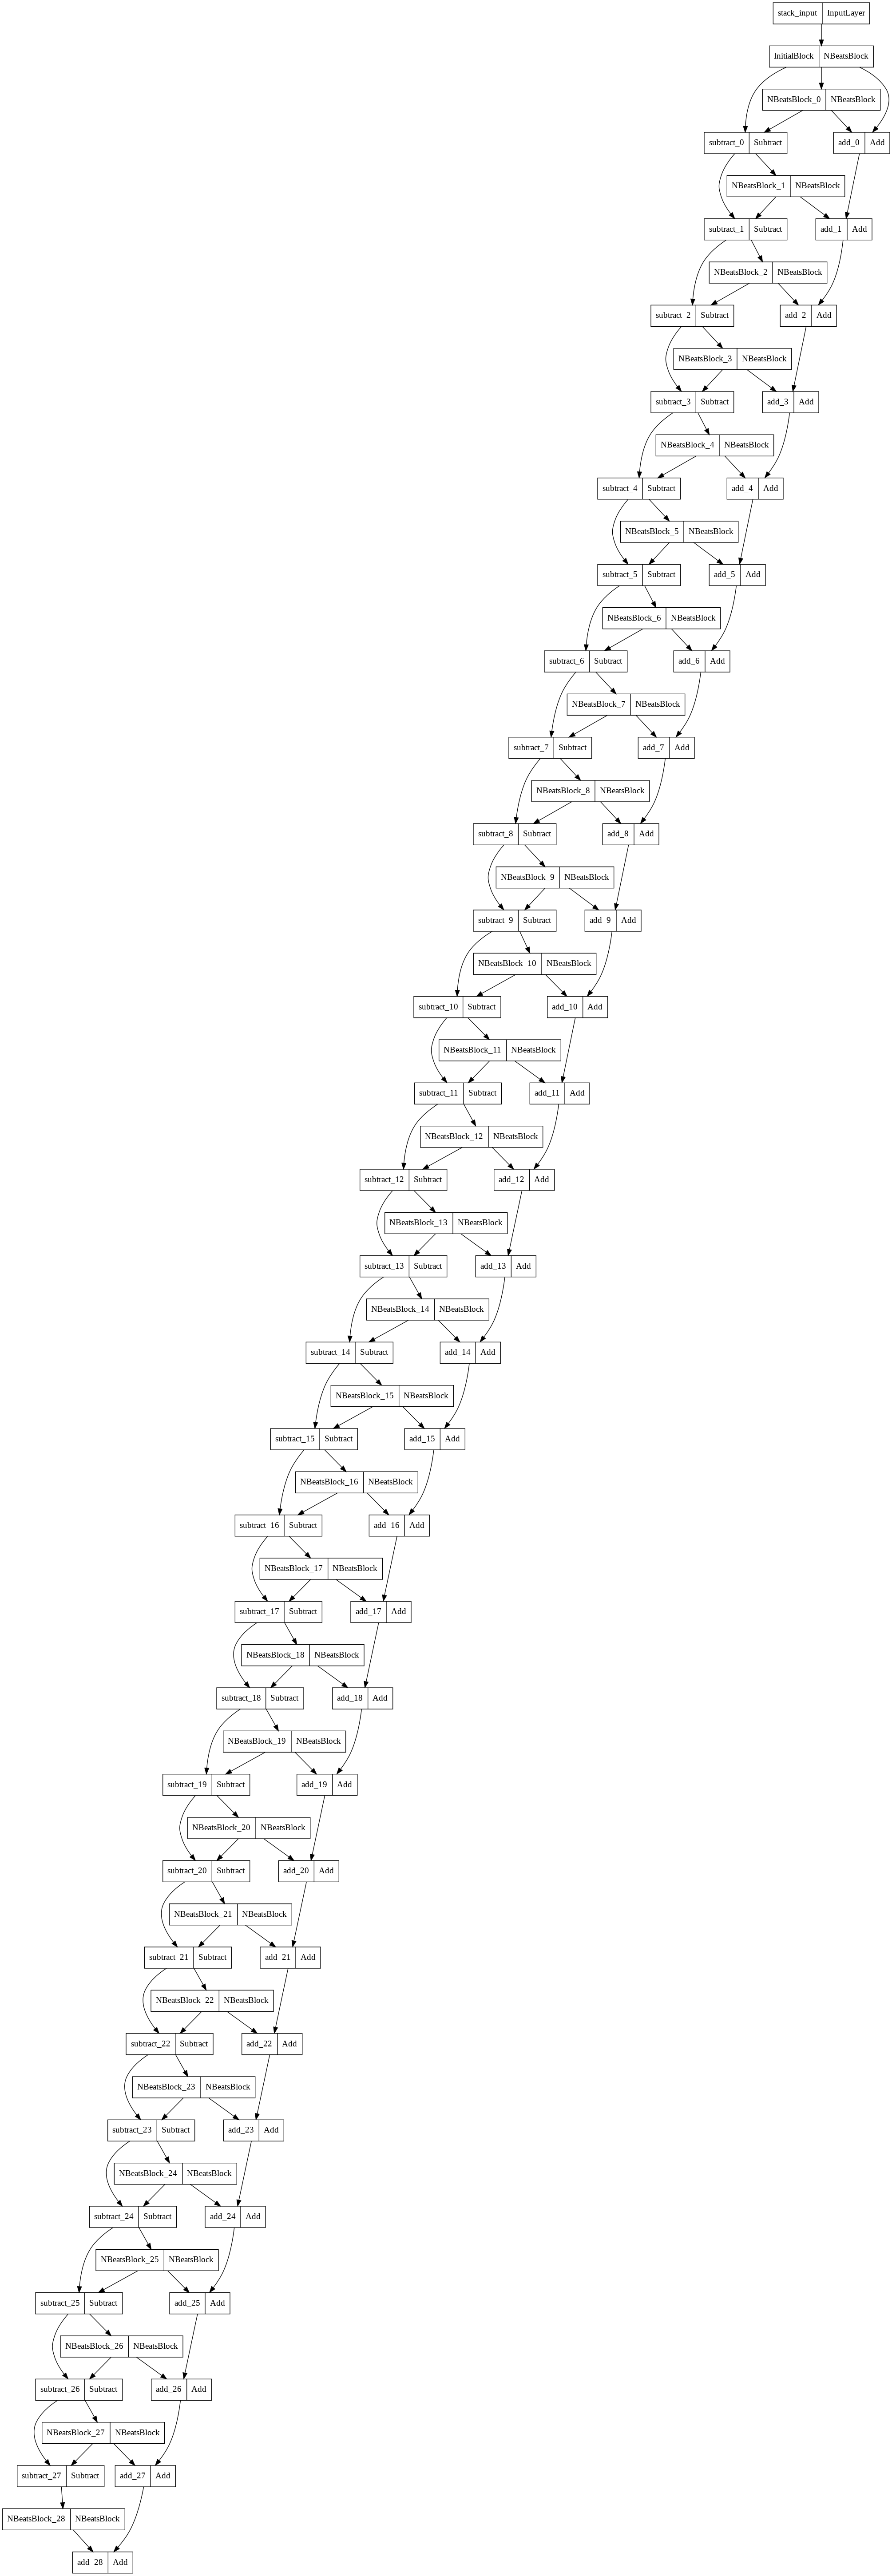

In [140]:
# Plot the N-BEATS model and inspect the architecture
from tensorflow.keras.utils import plot_model
plot_model(model_7)

## Model 8: Creating an ensemble (stacking different models together)

In [141]:
HORIZON, WINDOW_SIZE

(1, 7)

In [142]:
def get_ensemble_models(horizon=HORIZON,
                        train_data=train_dataset,
                        test_data=test_dataset,
                        num_iter=10,
                        num_epochs=1000,
                        loss_fns=["mae", "mse", "mape"]):
  """
  Returns a list of num_iter models each trained on MAE, MSE and MAPE loss.

  For example, if num_iter=10, a list of 30 trained models will be returned: 
  10 * len(["mae", "mse", "mape"]).
  """
  # Make empty list for trained ensemble models
  ensemble_models = []

  # Create num_iter number of models per loss function
  for i in range(num_iter):
    # Build and fit a new model with a different loss function
    for loss_function in loss_fns:
      print(f"Optimizing model by reducing: {loss_function} for {num_epochs} epochs, model number: {i}")

      # Construct a simple model (similar to model_1)
      model = tf.keras.Sequential([
        # Initialize dense layers with normal distribution for estimating prediction intervals later on
        layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
        layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
        layers.Dense(HORIZON)
      ])

      # Compile simple model with current loss function
      model.compile(loss=loss_function,
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=["mae", "mse"])
      
      # Fit the current model
      model.fit(train_data,
                epochs=num_epochs,
                verbose=0,
                validation_data=test_data,
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                            patience=200,
                                                            restore_best_weights=True),
                           tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                                patience=100,
                                                                verbose=1)])
      # Append fitted model to list of ensemble models
      ensemble_models.append(model)

  return ensemble_models

In [143]:
%%time
# Get list of trained ensemble models
ensemble_models = get_ensemble_models(num_iter=5,
                                      num_epochs=1000)

Optimizing model by reducing: mae for 1000 epochs, model number: 0
Optimizing model by reducing: mse for 1000 epochs, model number: 0

Epoch 411: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 511: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing: mape for 1000 epochs, model number: 0

Epoch 208: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 318: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 418: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
Optimizing model by reducing: mae for 1000 epochs, model number: 1
Optimizing model by reducing: mse for 1000 epochs, model number: 1

Epoch 305: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 405: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing: mape for 1000 epochs, model number: 1

Epoch 450: ReduceLROnPlateau reduci

In [144]:
ensemble_models

In [145]:
# Create a function which uses a list of trained models to make and return a list of predictions
def make_ensemble_preds(ensemble_models, data):
  ensemble_preds = []
  for model in ensemble_models:
    preds = model.predict(data)
    ensemble_preds.append(preds)
  return tf.constant(tf.squeeze(ensemble_preds))


In [146]:
# Create a list of ensemble predictions
%%time
ensemble_preds = make_ensemble_preds(ensemble_models=ensemble_models,
                                     data=test_dataset)
ensemble_preds

CPU times: user 582 ms, sys: 20 ms, total: 602 ms
Wall time: 602 ms


In [147]:
ensemble_preds

<tf.Tensor: shape=(15, 568), dtype=float32, numpy=
array([[18385.559, 18389.11 , 18324.09 , ..., 20984.393, 20566.639,
        20347.49 ],
       [18085.639, 18622.605, 18214.8  , ..., 20834.852, 20890.668,
        20190.656],
       [18242.26 , 18366.863, 18238.047, ..., 21047.908, 20601.941,
        20173.94 ],
       ...,
       [18563.814, 18244.043, 18319.73 , ..., 20908.336, 20638.342,
        20448.441],
       [18268.43 , 18576.621, 18203.06 , ..., 20917.926, 20831.764,
        20218.357],
       [18413.93 , 18511.672, 18288.531, ..., 21155.352, 20826.238,
        20315.71 ]], dtype=float32)>

In [148]:
ensemble_mean = tf.reduce_mean(ensemble_preds, axis=0)
ensemble_mean[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([18291.97 , 18523.574, 18249.787, 18088.695, 18652.29 , 19129.12 ,
       19168.44 , 19329.646, 21133.902, 22532.242], dtype=float32)>

In [149]:
ensemble_median = np.median(ensemble_preds, axis=0)
ensemble_median[:10]

array([18304.959, 18548.686, 18276.701, 18105.059, 18721.865, 19177.404,
       19226.44 , 19403.908, 21171.977, 22694.426], dtype=float32)

In [150]:
# Evaluate ensemble model predictions
ensemble_results = evaluate_preds(y_true=y_test,
                                  y_pred=ensemble_mean)
ensemble_results

{'mae': 1253.1357,
 'mape': 2.9906538,
 'mase': 1.0076251,
 'mse': 2964172.5,
 'rmse': 1721.6772}

In [151]:
# Evaluate ensemble model predictions
ensemble_results = evaluate_preds(y_true=y_test,
                                  y_pred=ensemble_median)
ensemble_results

{'mae': 1247.0583,
 'mape': 2.9754856,
 'mase': 1.0027384,
 'mse': 2938717.5,
 'rmse': 1714.2688}

In [152]:
model_1_results

{'mae': 1255.478,
 'mape': 2.9978268,
 'mase': 1.0095085,
 'mse': 2976047.2,
 'rmse': 1725.1224}

**Plotting the prediction intervals (uncertainty estimates) of our ensemble**

There are two major types of uncertainty in machine learning you should know about:

**Aleatoric uncertainty** - this type of uncertainty cannot be reduced and it is often referred as "data" uncertainty or "subway" uncertainty

**Epistemic uncertainty** - this type of uncertainty can be reduced, it also referred to as "model" or "coconut" uncertainty

In [153]:
# Find upper and lower bounds of ensemble predictions
def get_upper_lower(preds): # 1. Take the predictions from a number of randomly intialized models

  # 2. Measure the standard deviation of the predictions
  std = tf.math.reduce_std(preds, axis=0)

  # 3. Multiply the standard deviation by 1.96
  interval = 1.96 * std

  # 4. Get the prediction interval upper and lower bounds 
  preds_mean = tf.reduce_mean(preds, axis=0)
  lower, upper = preds_mean - interval, preds_mean + interval

  return lower, upper

In [154]:
# Get the upper and lower bounds of the 95% percent prediction interval
lower, upper = get_upper_lower(preds=ensemble_preds)

In [155]:
X_test.index[:10]

DatetimeIndex(['2020-12-09', '2020-12-10', '2020-12-11', '2020-12-12',
               '2020-12-13', '2020-12-14', '2020-12-15', '2020-12-16',
               '2020-12-17', '2020-12-18'],
              dtype='datetime64[ns]', name='Date', freq=None)

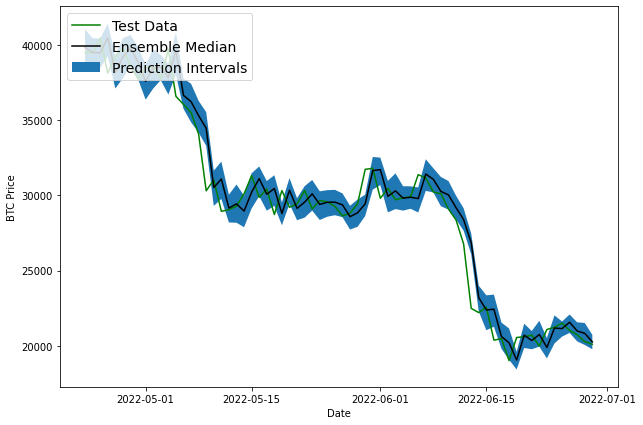

In [156]:
# Get the median/mean values of our ensemble preds
ensemble_median = np.median(ensemble_preds, axis=0)

# Plot the median of our ensemble preds along with the prediction intervals (where the predictions fall between)
offset=500
plt.figure(figsize=(10, 7))
plt.plot(X_test.index[offset:], y_test[offset:], "g", label="Test Data")
plt.plot(X_test.index[offset:], ensemble_median[offset:], "k-", label="Ensemble Median")
plt.xlabel("Date")
plt.ylabel("BTC Price")
# To plot the upper and lower bounds, let's use fill_between: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.fill_between.html
plt.fill_between(X_test.index[offset:],
                 (lower)[offset:],
                 (upper)[offset:], label="Prediction Intervals")
plt.legend(loc="upper left", fontsize=14);

##Model 9: Train a model on the full historical data to make predictions into the future

So far all of our models have predicted on the test dataset, however, this is only a pseudofuture. Let's now build a model which is capable of predicting into the future!

In [157]:
HORIZON = 1
WINDOW_SIZE = 7

In [158]:
bitcoin_prices_windowed.head()

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2014-09-17,457.334015,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-18,424.440002,25,457.334015,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-19,394.795990,25,424.440002,457.334015,NaN,NaN,NaN,NaN,NaN
2014-09-20,408.903992,25,394.795990,424.440002,457.334015,NaN,NaN,NaN,NaN
2014-09-21,398.821014,25,408.903992,394.795990,424.440002,457.334015,NaN,NaN,NaN


In [159]:
bitcoin_prices_windowed.tail()

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2022-06-25,21502.337891,6.25,21231.656250,21085.876953,19987.029297,20710.597656,20599.537109,20553.271484,19017.642578
2022-06-26,21027.294922,6.25,21502.337891,21231.656250,21085.876953,19987.029297,20710.597656,20599.537109,20553.271484
2022-06-27,20735.478516,6.25,21027.294922,21502.337891,21231.656250,21085.876953,19987.029297,20710.597656,20599.537109
2022-06-28,20280.634766,6.25,20735.478516,21027.294922,21502.337891,21231.656250,21085.876953,19987.029297,20710.597656
2022-06-29,20104.023438,6.25,20280.634766,20735.478516,21027.294922,21502.337891,21231.656250,21085.876953,19987.029297


In [160]:
# Train model on entire data to make predictions for the next day
X_all = bitcoin_prices_windowed.dropna().drop(["Price", "block_reward"], axis=1).to_numpy()
# Get labels
y_all = bitcoin_prices_windowed.dropna()["Price"].to_numpy()

len(X_all), len(y_all)

(2836, 2836)

In [161]:
X_all[:5], y_all[:5]

(array([[435.790985, 402.152008, 398.821014, 408.903992, 394.79599 ,
         424.440002, 457.334015],
        [423.204987, 435.790985, 402.152008, 398.821014, 408.903992,
         394.79599 , 424.440002],
        [411.574005, 423.204987, 435.790985, 402.152008, 398.821014,
         408.903992, 394.79599 ],
        [404.424988, 411.574005, 423.204987, 435.790985, 402.152008,
         398.821014, 408.903992],
        [399.519989, 404.424988, 411.574005, 423.204987, 435.790985,
         402.152008, 398.821014]]),
 array([423.204987, 411.574005, 404.424988, 399.519989, 377.181   ]))

In [162]:
# Turn data into efficient running tensors

features_dataset_all = tf.data.Dataset.from_tensor_slices(X_all)
labels_dataset_all = tf.data.Dataset.from_tensor_slices(y_all)

# Combine features and labels
dataset_all = tf.data.Dataset.zip((features_dataset_all, labels_dataset_all))

# Batch and prefetch for optimial performance
BATCH_SIZE = 1024
dataset_all = dataset_all.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

dataset_all

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>

In [163]:
tf.random.set_seed(42)

# Create model (nice and simple, just to test)
model_9 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON)
], name="model_9_future_model")

# Compile
model_9.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam())

# Fit model on all of the data to make future forecasts
model_9.fit(dataset_all,
            epochs=100,
            verbose=0)

**Make predictions into future**

In [164]:
# How many timestesp to predict into the future?
INTO_FUTURE = 30

In [165]:
# 1. Create function to make predictions into the future
def make_future_forecasts(values, model, into_future, window_size=WINDOW_SIZE) -> list:
  """
  Make future forecasts into_future steps after values ends.

  Returns future forecasts as a list of floats.
  """
  # 2. Create an empty list for future forecasts/prepare data to forecast on
  future_forecast = []
  last_window = values[-WINDOW_SIZE:]

  # 3. Make INTO_FUTURE numer of predictions, altering the data which gets predicted on each
  for _ in range(INTO_FUTURE):
    # Predict on the last window then append it again, again, again (our model will eventually start to make forecasts on its own forecasts)
    future_pred = model.predict(tf.expand_dims(last_window, axis=0))
    print(f"Predicting on:\n {last_window} -> Prediction: {tf.squeeze(future_pred).numpy()}\n")

    # Append predictions to future_forecast
    future_forecast.append(tf.squeeze(future_pred).numpy())

    # Update last window with new pred and get WINDOW_SIZE most recent preds (model was trained on WINDOW_SIZE windows)
    last_window = np.append(last_window, future_pred)[-WINDOW_SIZE:]
  
  return future_forecast

In [166]:
# Make forecasts into the future
future_forecast = make_future_forecasts(values=y_all,
                                        model=model_9,
                                        into_future=INTO_FUTURE,
                                        window_size=WINDOW_SIZE)

Predicting on:
 [21085.876953 21231.65625  21502.337891 21027.294922 20735.478516
 20280.634766 20104.023438] -> Prediction: 21389.978515625

Predicting on:
 [21231.65625    21502.337891   21027.294922   20735.478516
 20280.634766   20104.023438   21389.97851562] -> Prediction: 21398.396484375

Predicting on:
 [21502.337891   21027.294922   20735.478516   20280.634766
 20104.023438   21389.97851562 21398.39648438] -> Prediction: 21364.544921875

Predicting on:
 [21027.294922   20735.478516   20280.634766   20104.023438
 21389.97851562 21398.39648438 21364.54492188] -> Prediction: 20854.18359375

Predicting on:
 [20735.478516   20280.634766   20104.023438   21389.97851562
 21398.39648438 21364.54492188 20854.18359375] -> Prediction: 20665.419921875

Predicting on:
 [20280.634766   20104.023438   21389.97851562 21398.39648438
 21364.54492188 20854.18359375 20665.41992188] -> Prediction: 20506.177734375

Predicting on:
 [20104.023438   21389.97851562 21398.39648438 21364.54492188
 20854.1

In [167]:
future_forecast

[21389.979,
 21398.396,
 21364.545,
 20854.184,
 20665.42,
 20506.178,
 20837.324,
 21543.062,
 21416.127,
 21202.924,
 20825.252,
 20797.75,
 20888.707,
 21286.498,
 21582.514,
 21368.248,
 21128.2,
 20939.43,
 21047.473,
 21245.537,
 21525.824,
 21566.135,
 21338.748,
 21170.877,
 21147.61,
 21322.72,
 21509.521,
 21637.463,
 21551.035,
 21373.459]

In [168]:
def get_future_dates(start_date, into_future, offset=1):
  """
  Returns array of datetime values ranging from start_date to start_date+into_future
  """
  start_date = start_date + np.timedelta64(offset, "D") # specify start date, "D" stands for day
  end_date = start_date + np.timedelta64(into_future, "D") # specify end date
  return np.arange(start_date, end_date, dtype="datetime64[D]") # return a date range between start and end date

In [169]:
# Last timestep of timesteps (currently np.datetime64 format)
last_timestep = bitcoin_prices.index[-1]
last_timestep

Timestamp('2022-06-29 00:00:00')

In [170]:
# Get next two week of timesteps
next_time_steps = get_future_dates(start_date=last_timestep,
                                   into_future=INTO_FUTURE)
next_time_steps

array(['2022-06-30', '2022-07-01', '2022-07-02', '2022-07-03',
       '2022-07-04', '2022-07-05', '2022-07-06', '2022-07-07',
       '2022-07-08', '2022-07-09', '2022-07-10', '2022-07-11',
       '2022-07-12', '2022-07-13', '2022-07-14', '2022-07-15',
       '2022-07-16', '2022-07-17', '2022-07-18', '2022-07-19',
       '2022-07-20', '2022-07-21', '2022-07-22', '2022-07-23',
       '2022-07-24', '2022-07-25', '2022-07-26', '2022-07-27',
       '2022-07-28', '2022-07-29'], dtype='datetime64[D]')

In [171]:
bitcoin_prices.index

DatetimeIndex(['2014-09-17', '2014-09-18', '2014-09-19', '2014-09-20',
               '2014-09-21', '2014-09-22', '2014-09-23', '2014-09-24',
               '2014-09-25', '2014-09-26',
               ...
               '2022-06-20', '2022-06-21', '2022-06-22', '2022-06-23',
               '2022-06-24', '2022-06-25', '2022-06-26', '2022-06-27',
               '2022-06-28', '2022-06-29'],
              dtype='datetime64[ns]', name='Date', length=2843, freq=None)

In [172]:
# Insert last timestep/final price into next time steps and future forecasts so the plot doesn't look janky
next_time_steps = np.insert(next_time_steps, 0, last_timestep)
future_forecast = np.insert(future_forecast, 0, btc_price[-1])
next_time_steps, future_forecast

(array(['2022-06-29', '2022-06-30', '2022-07-01', '2022-07-02',
        '2022-07-03', '2022-07-04', '2022-07-05', '2022-07-06',
        '2022-07-07', '2022-07-08', '2022-07-09', '2022-07-10',
        '2022-07-11', '2022-07-12', '2022-07-13', '2022-07-14',
        '2022-07-15', '2022-07-16', '2022-07-17', '2022-07-18',
        '2022-07-19', '2022-07-20', '2022-07-21', '2022-07-22',
        '2022-07-23', '2022-07-24', '2022-07-25', '2022-07-26',
        '2022-07-27', '2022-07-28', '2022-07-29'], dtype='datetime64[D]'),
 array([20104.023, 21389.979, 21398.396, 21364.545, 20854.184, 20665.42 ,
        20506.178, 20837.324, 21543.062, 21416.127, 21202.924, 20825.252,
        20797.75 , 20888.707, 21286.498, 21582.514, 21368.248, 21128.2  ,
        20939.43 , 21047.473, 21245.537, 21525.824, 21566.135, 21338.748,
        21170.877, 21147.61 , 21322.72 , 21509.521, 21637.463, 21551.035,
        21373.459], dtype=float32))

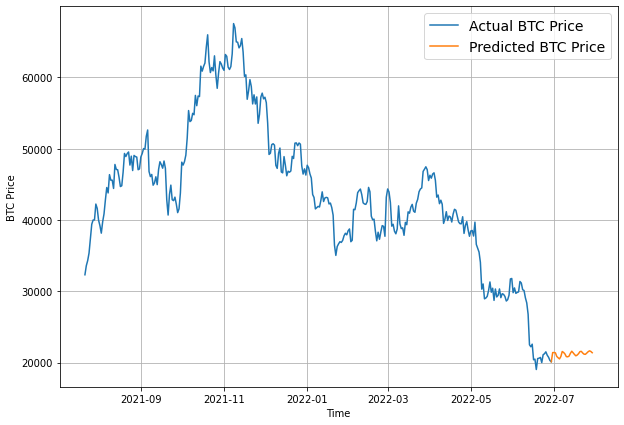

In [173]:
# Plot future prices predictions of Bitcoin
plt.figure(figsize=(10, 7))
plot_time_series(bitcoin_prices.index, btc_price, start=2500, format="-", label="Actual BTC Price")
plot_time_series(next_time_steps, future_forecast, format="-", label="Predicted BTC Price")

Despite the more recent bitcoin price crashes, our model predicts that it will increase and decrease over the next two weeks. Do we believe this? Let's take a look at the turkey problem.

##Model 10: Why forecasting is unreliable (the turkey problem 🦃)

In [174]:
# Let's introduce a turkey prolbem to our BTC data (price of BTC falls 100x in one day)
btc_price_turkey = btc_price.copy()
btc_price_turkey[-1] = btc_price_turkey[-1] / 100

In [175]:
# Manufacture an extra price on the end (to showcase our Turkey problem)
btc_price_turkey[-10:]

[20599.537109,
 20710.597656,
 19987.029297,
 21085.876953,
 21231.65625,
 21502.337891,
 21027.294922,
 20735.478516,
 20280.634766,
 201.04023438000002]

In [176]:
# Get the timesteps for the turkey problem
btc_timesteps_turkey = np.array(bitcoin_prices.index)
btc_timesteps_turkey[-10:]

array(['2022-06-20T00:00:00.000000000', '2022-06-21T00:00:00.000000000',
       '2022-06-22T00:00:00.000000000', '2022-06-23T00:00:00.000000000',
       '2022-06-24T00:00:00.000000000', '2022-06-25T00:00:00.000000000',
       '2022-06-26T00:00:00.000000000', '2022-06-27T00:00:00.000000000',
       '2022-06-28T00:00:00.000000000', '2022-06-29T00:00:00.000000000'],
      dtype='datetime64[ns]')

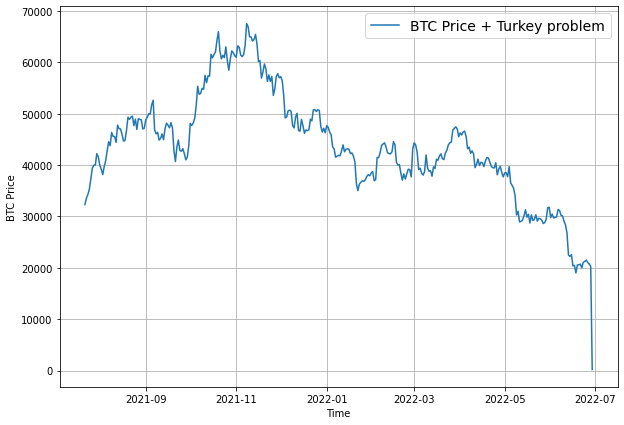

In [177]:
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=btc_timesteps_turkey,
                 values=btc_price_turkey,
                 format="-",
                 label="BTC Price + Turkey problem",
                 start=2500
                 )

In [178]:
HORIZON = 1
WINDOW_SIZE = 7

In [179]:
# Create train and test sets for turkey problem data
full_windows, full_labels = make_windows(np.array(btc_price_turkey), window_size=WINDOW_SIZE, horizon=HORIZON)

X_train, X_test, y_train, y_test = make_train_test_splits(full_windows, full_labels)
len(X_train), len(X_test), len(y_train), len(y_test)

(2268, 568, 2268, 568)

In [180]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1024      
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,153
Trainable params: 1,153
Non-trainable params: 0
_________________________________________________________________


In [181]:
# Clone model 1 architecture for turkey model and fit the turkey model on the turkey data
turkey_model = tf.keras.models.clone_model(model_1)
turkey_model._name = "model_10_turkey_model"
turkey_model.compile(loss="mae",
                     optimizer=tf.keras.optimizers.Adam())
turkey_model.fit(X_train, y_train,
                 epochs=100,
                 verbose=0,
                 batch_size=128,
                 validation_data=(X_test, y_test),
                 callbacks=[create_model_checkpoint(turkey_model.name)])

INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


In [182]:
# Evaluate model on test data
turkey_model.evaluate(X_test, y_test)

18/18 [==============================] - 0s 2ms/step - loss: 1346.3638


1346.36376953125

In [183]:
# Load best performing turkey model and evaluate on test data
turkey_model = tf.keras.models.load_model("model_experiments/model_10_turkey_model")
turkey_model.evaluate(X_test, y_test)

18/18 [==============================] - 0s 2ms/step - loss: 1285.1919


1285.19189453125

In [184]:
# Make predictions with turkey model
turkey_preds = make_preds(turkey_model, X_test)
turkey_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([18470.63 , 18484.766, 18329.29 , 18065.01 , 18700.602, 19132.473,
       19264.123, 19433.031, 21065.443, 22679.896], dtype=float32)>

In [185]:
# Evaluate turkey preds
turkey_results = evaluate_preds(y_true=y_test,
                                y_pred=turkey_preds)
turkey_results

{'mae': 12462.588,
 'mape': 69.52006,
 'mase': 9.745876,
 'mse': 240534270.0,
 'rmse': 14900.673}

In [186]:
model_1_results

{'mae': 1255.478,
 'mape': 2.9978268,
 'mase': 1.0095085,
 'mse': 2976047.2,
 'rmse': 1725.1224}

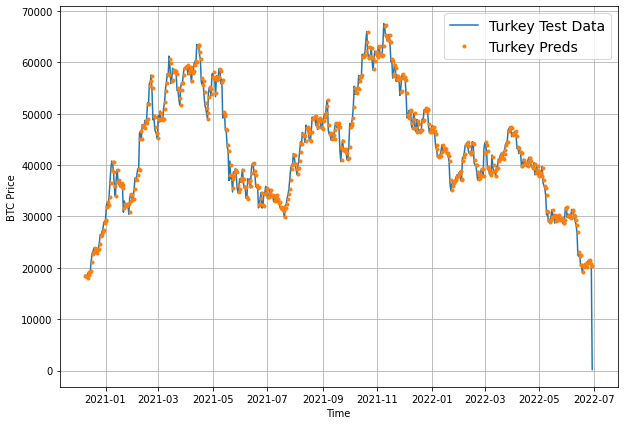

In [187]:
plt.figure(figsize=(10, 7))
offset=0
plot_time_series(timesteps=btc_timesteps_turkey[-len(X_test):],
                 values=btc_price_turkey[-len(y_test):], 
                 format="-",
                 label="Turkey Test Data", 
                 start=offset)
plot_time_series(timesteps=btc_timesteps_turkey[-len(X_test):],
                 values=turkey_preds,
                 label="Turkey Preds",
                 start=offset);

#Model Comparison

In [188]:
ensemble_results

{'mae': 1247.0583,
 'mape': 2.9754856,
 'mase': 1.0027384,
 'mse': 2938717.5,
 'rmse': 1714.2688}

In [189]:
# Compare different model results (w = window, h = horizon, e.g. w=7 means a window size of 7)
model_results = pd.DataFrame({"naive_model": naive_results,
                              "model_1_dense_w7_h1": model_1_results,
                              "model_2_dense_w30_h1": model_2_results,
                              "model_3_dense_w30_h7": model_3_results,
                              "model_4_CONV1D": model_4_results,
                              "model_5_LSTM": model_5_results,
                              "model_6_multivariate": model_6_results,
                              "model_7_NBEATS": model_7_results,
                              "model_8_ensemble": ensemble_results,
                              "model_10_turkey": turkey_results}).T
model_results.head(10)

,mae,mse,rmse,mape,mase
naive_model,1241.873047,2.914936e+06,1707.318359,2.958014,0.998569
model_1_dense_w7_h1,1255.478027,2.976047e+06,1725.122437,2.997827,1.009508
model_2_dense_w30_h1,1343.906128,3.256637e+06,1804.615479,3.193263,1.073645
model_3_dense_w30_h7,2688.191650,1.302947e+07,3079.523438,6.447336,2.144631
model_4_CONV1D,1257.520508,2.992751e+06,1729.956909,3.002136,1.011151
model_5_LSTM,1322.844360,3.180427e+06,1783.375122,3.162112,1.063677
model_6_multivariate,1253.022583,2.954998e+06,1719.010864,2.987426,1.007534
model_7_NBEATS,1248.373413,2.967661e+06,1722.690063,2.980832,1.003796
model_8_ensemble,1247.058350,2.938718e+06,1714.268799,2.975486,1.002738
model_10_turkey,12462.587891,2.405343e+08,14900.672852,69.520058,9.745876


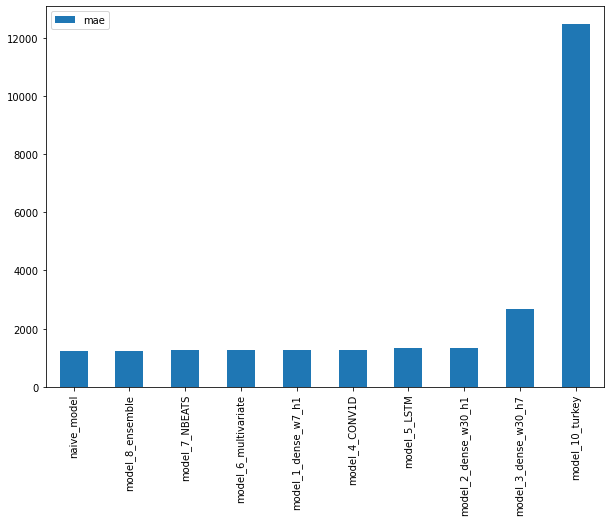

In [190]:
# Sort model results by MAE and plot them 
model_results[["mae"]].sort_values(by="mae").plot(figsize=(10, 7), kind="bar");